In [90]:
import os
import pandas as pd
import re

from kedro.pipeline import *
from kedro.io import *
from kedro.runner import *

import pickle
import os

import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import product



In [91]:
csv_file_path = r'C:\Users\jrubio\vivalto_data\data\04_feature\table_I_baseline.csv'
df = pd.read_csv(csv_file_path)
df

WEEK_LABEL DIAGNOSIS_CATEGORY           AGE_CLASS RSS_DURATION_CLASS  \
0    2023-07-17           COVID-19  65 years and older    5 days and more   
1    2023-07-24           COVID-19  65 years and older    5 days and more   
2    2023-07-31           COVID-19  65 years and older    5 days and more   
3    2023-08-07           COVID-19  65 years and older    5 days and more   
4    2023-08-14           COVID-19  65 years and older    5 days and more   
..          ...                ...                 ...                ...   
970  2023-09-11                RSV   [50 - 64[ year(s)       [2 - 5[ days   
971  2023-09-18                RSV   [50 - 64[ year(s)       [2 - 5[ days   
972  2023-09-25                RSV   [50 - 64[ year(s)       [2 - 5[ days   
973  2023-10-02                RSV   [50 - 64[ year(s)       [2 - 5[ days   
974  2023-10-09                RSV   [50 - 64[ year(s)       [2 - 5[ days   

     N_CASES  BASELINE_N_CASES  LOWER_CI_BASELINE_N_CASES  \
0        3.0                 1                        0.0   
1        0.0                 1                        0.0   
2        0.0                 1                        0.0   
3        2.0                 6                        0.0   
4        4.0                 6                        0.0   
..       ...               ...                        ...   
970      0.0                 0                        0.0   
971      0.0                 0                        0.0   
972      0.0                 0                        0.0   
973      0.0                 0                        0.0   
974      0.0                 0                        0.0   

     UPPER_CI_BASELINE_N_CASES  ALERT_N_CASES  
0                    10.817394              0  
1                    10.817394              0  
2                    10.817394              0  
3                    15.817394              0  
4                    15.817394              0  
..                         ...            ...  
970                   0.000000              0  
971                   0.000000              0  
972                   0.000000              0  
973                   0.000000              0  
974                   0.000000              0  

[975 rows x 9 columns]

In [94]:
# Créer le vecteur correction_factor_last_weeks
biased_weeks = 5
correction_factor_last_weeks = np.linspace(1, 0.5, biased_weeks + 1)

# Créer une colonne correction_factor avec des valeurs 1 dans tout le DataFrame
df['correction_factor'] = 1

# Boucle sur chaque combinaison de catégories
for diagnosis_category in categories_diagnosis:
    for age_class in categories_age:
        for rss_duration_class in categories_rss_duration:
            # Filtrer les lignes pour la combinaison actuelle de catégories
            filtered_df = df.loc[(df['DIAGNOSIS_CATEGORY'] == diagnosis_category) &
                                 (df['AGE_CLASS'] == age_class) &
                                 (df['RSS_DURATION_CLASS'] == rss_duration_class)]

            # Affecter les valeurs du vecteur correction_factor_last_weeks aux 10 dernières lignes de chaque sous-DataFrame
            df.loc[filtered_df.index[-biased_weeks:], 'correction_factor'] = correction_factor_last_weeks[1:]

# Créer une colonne N_CASES_NOWCAST en multipliant N_CASES par correction_factor
df['N_CASES_NOWCAST'] = df['N_CASES'] / df['correction_factor']

In [95]:
df = df.loc[(df['DIAGNOSIS_CATEGORY'] == 'GENERAL_RI') &
                     (df['AGE_CLASS'] == '[1 - 5[ year(s)') &
                     (df['RSS_DURATION_CLASS'] == 'Less than 2 days')]
df

WEEK_LABEL DIAGNOSIS_CATEGORY        AGE_CLASS RSS_DURATION_CLASS  \
442  2023-07-17         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
443  2023-07-24         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
444  2023-07-31         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
445  2023-08-07         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
446  2023-08-14         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
447  2023-08-21         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
448  2023-08-28         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
449  2023-09-04         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
450  2023-09-11         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
451  2023-09-18         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
452  2023-09-25         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
453  2023-10-02         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   
454  2023-10-09         GENERAL_RI  [1 - 5[ year(s)   Less than 2 days   

     N_CASES  BASELINE_N_CASES  LOWER_CI_BASELINE_N_CASES  \
442      0.0                 0                        0.0   
443      0.0                 0                        0.0   
444      0.0                 0                        0.0   
445      0.0                 0                        0.0   
446      0.0                 0                        0.0   
447      2.0                 0                        0.0   
448      0.0                 0                        0.0   
449      0.0                 0                        0.0   
450      0.0                 0                        0.0   
451      0.0                 0                        0.0   
452      0.0                 0                        0.0   
453      0.0                 0                        0.0   
454      0.0                 0                        0.0   

     UPPER_CI_BASELINE_N_CASES  ALERT_N_CASES  correction_factor  \
442                        0.0              0                1.0   
443                        0.0              0                1.0   
444                        0.0              0                1.0   
445                        0.0              0                1.0   
446                        0.0              0                1.0   
447                        0.0              1                1.0   
448                        0.0              0                1.0   
449                        0.0              0                1.0   
450                        0.0              0                0.9   
451                        0.0              0                0.8   
452                        0.0              0                0.7   
453                        0.0              0                0.6   
454                        0.0              0                0.5   

     N_CASES_NOWCAST  
442              0.0  
443              0.0  
444              0.0  
445              0.0  
446              0.0  
447              2.0  
448              0.0  
449              0.0  
450              0.0  
451              0.0  
452              0.0  
453              0.0  
454              0.0

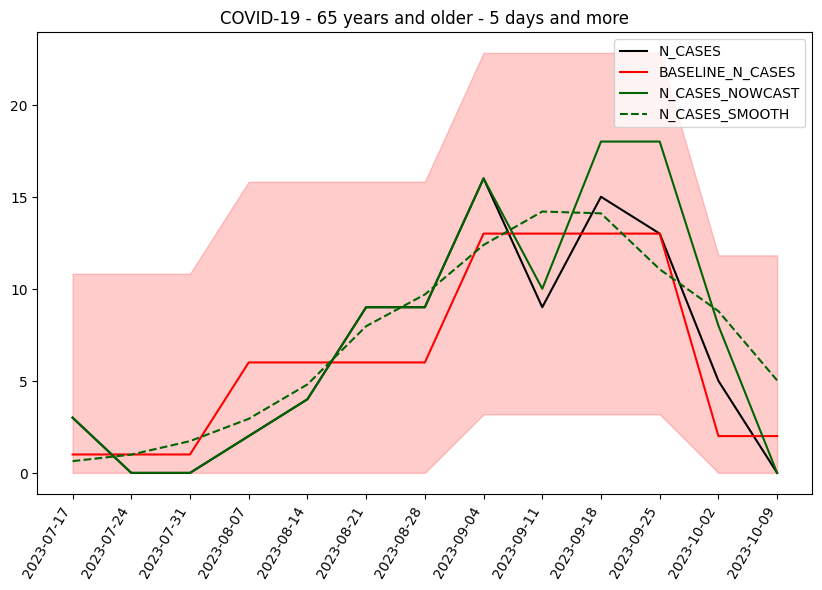

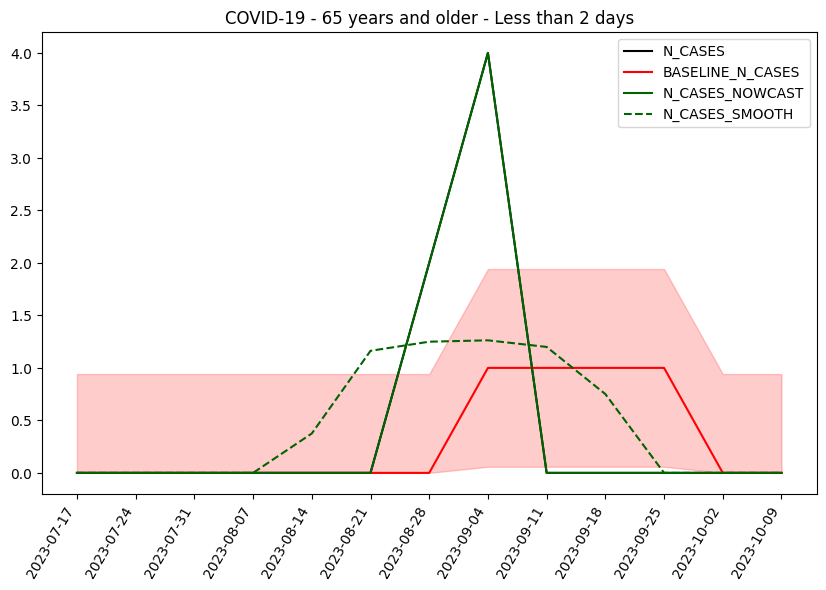

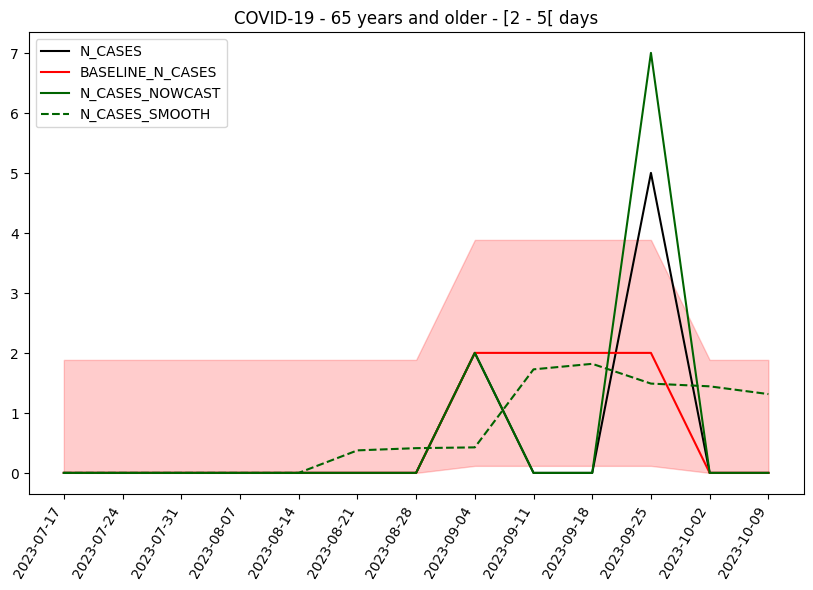

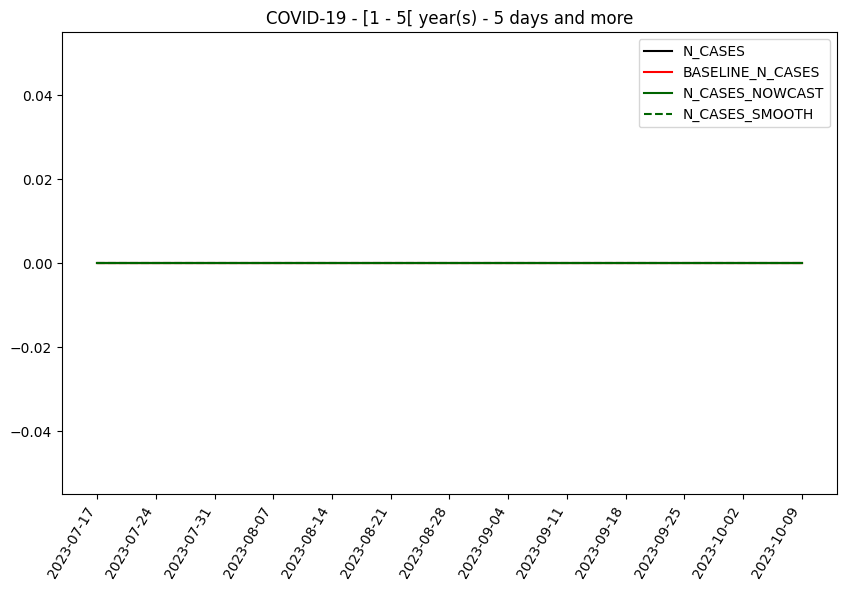

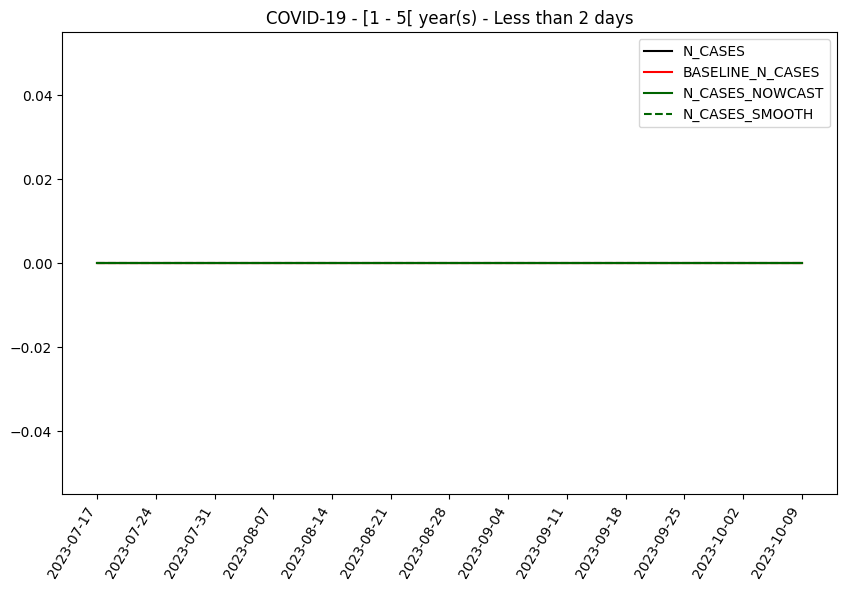

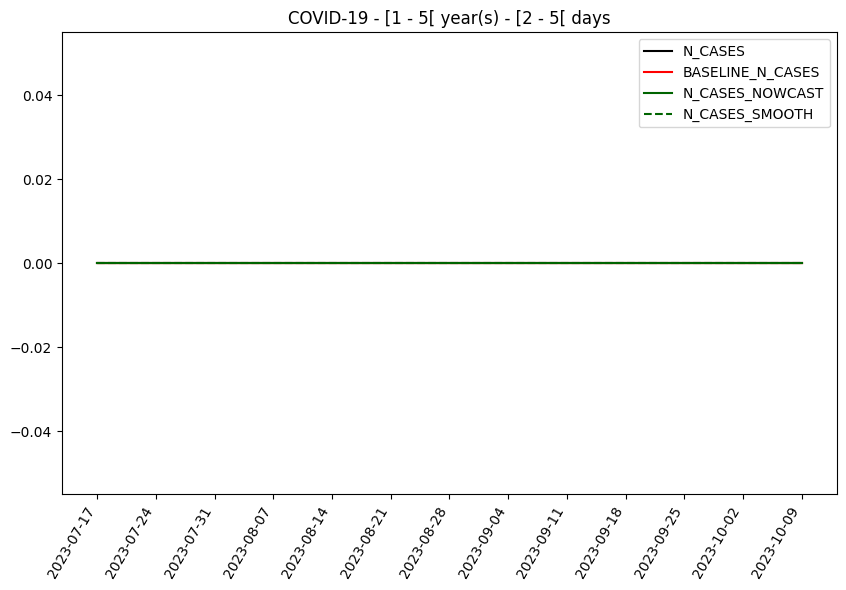

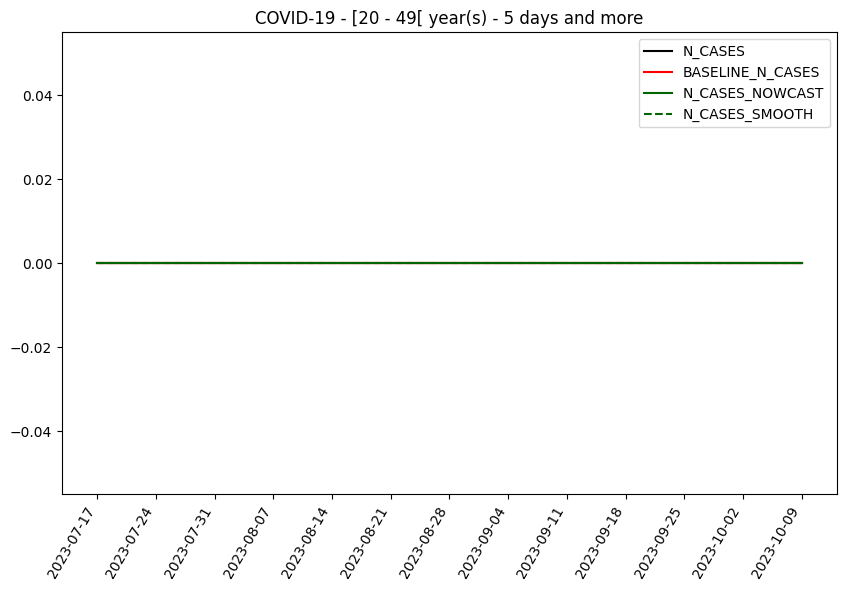

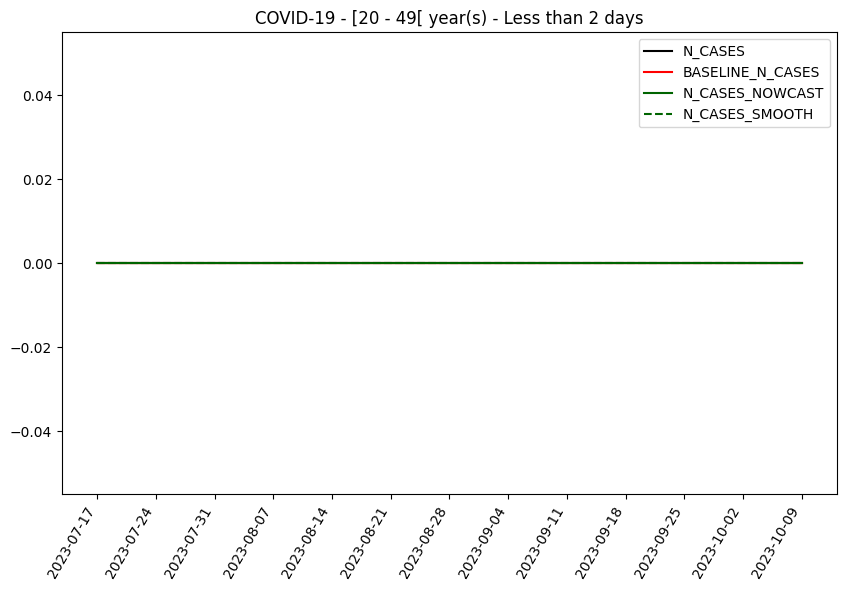

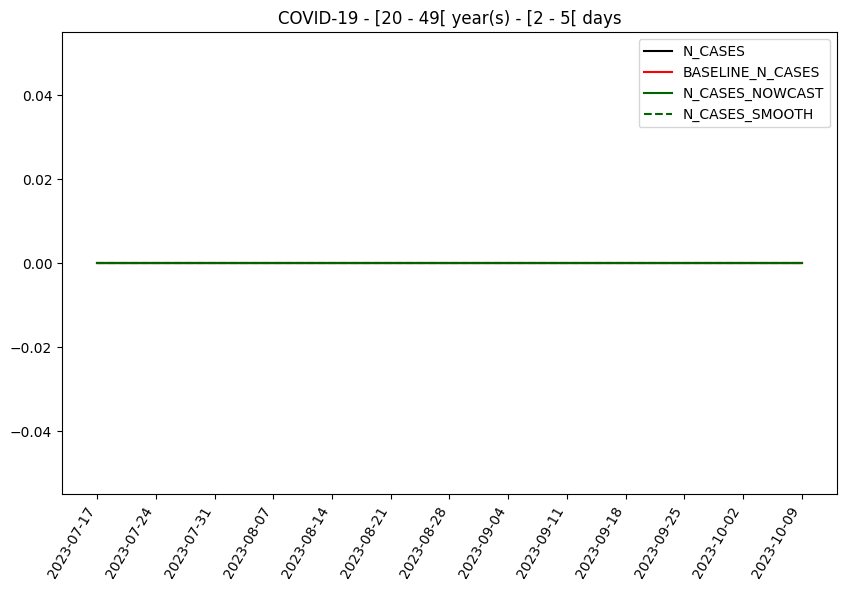

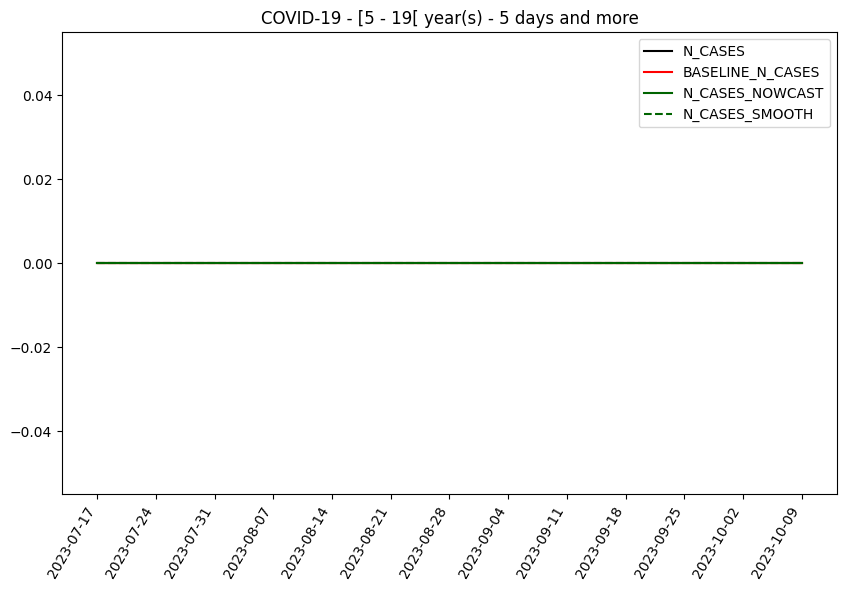

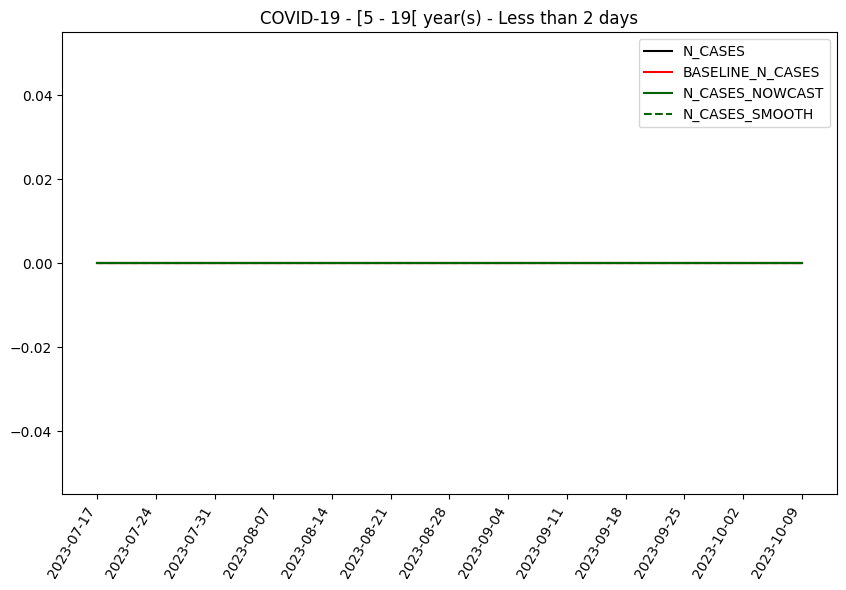

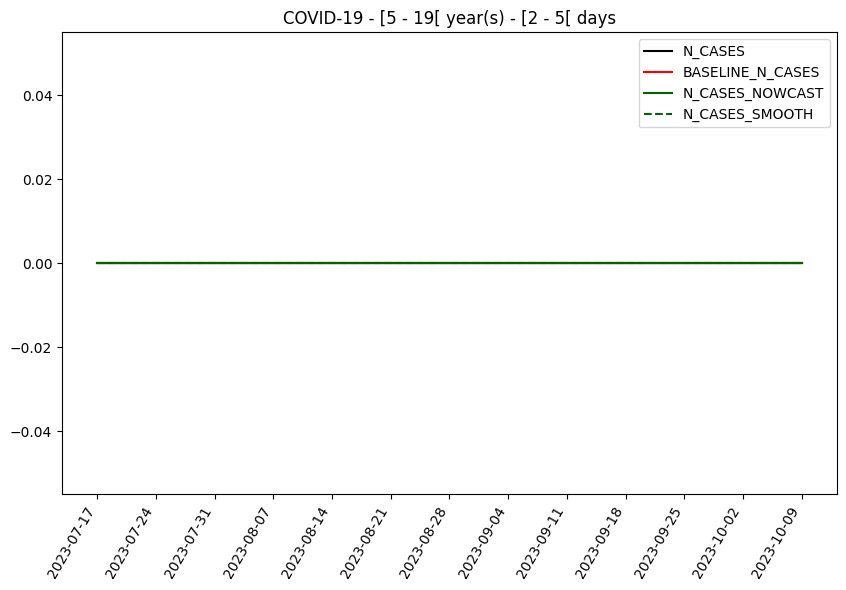

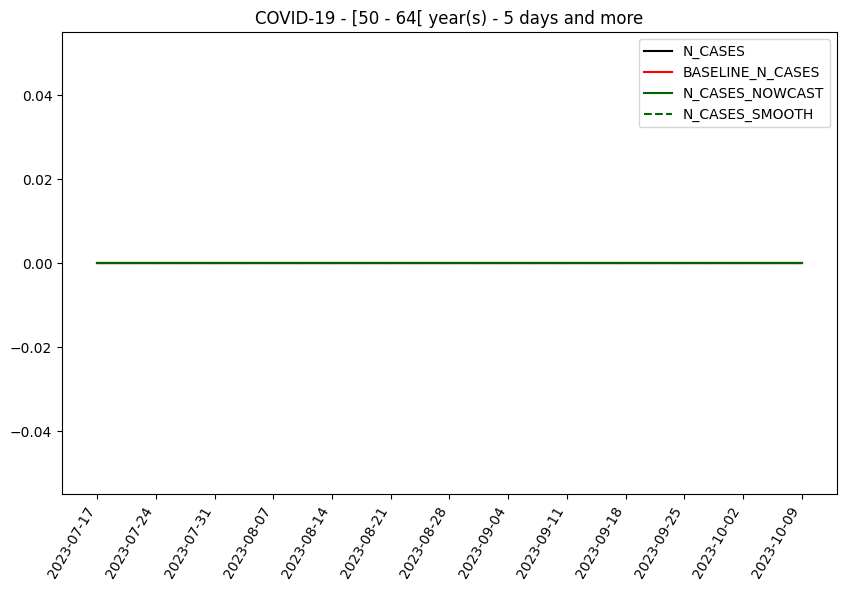

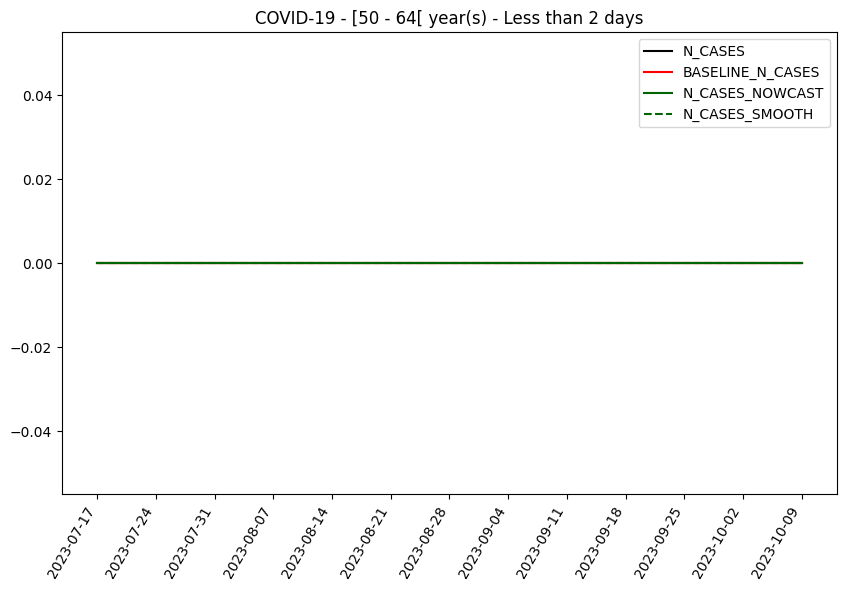

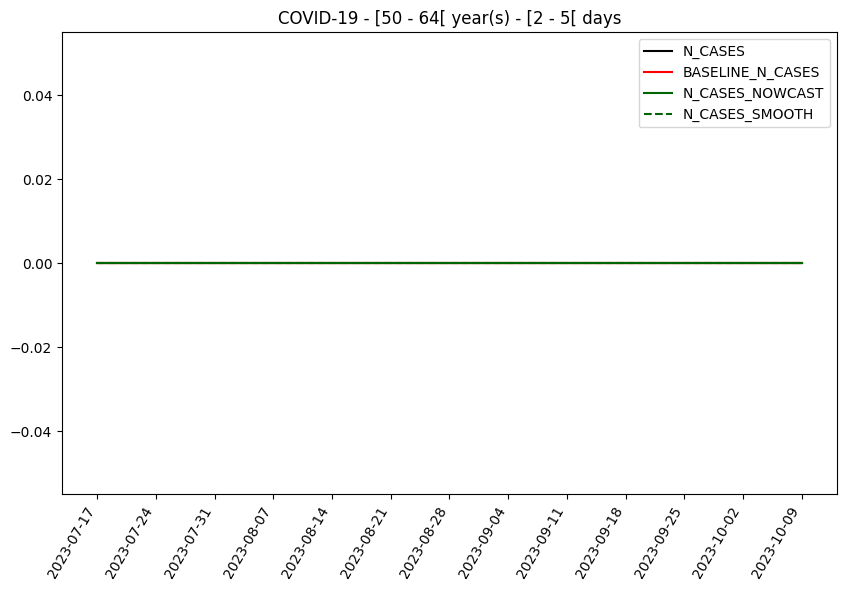

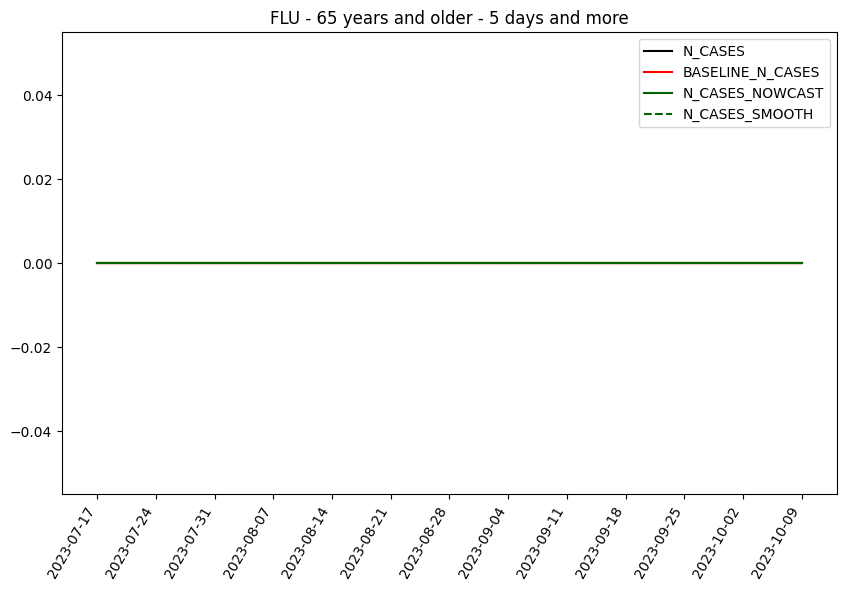

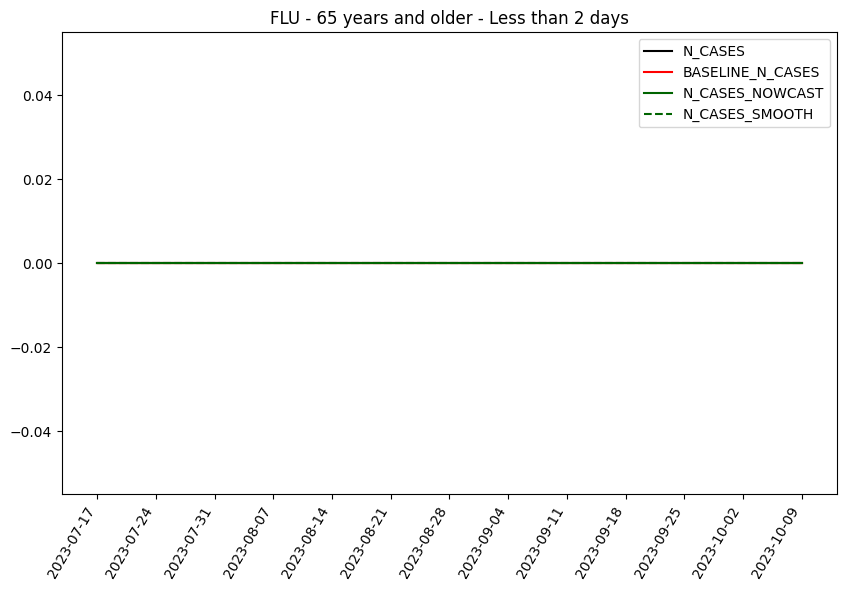

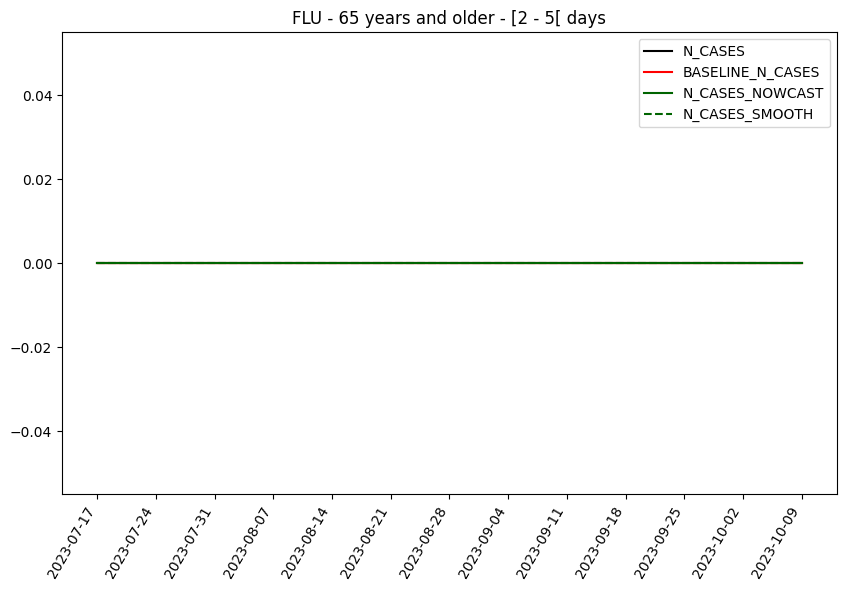

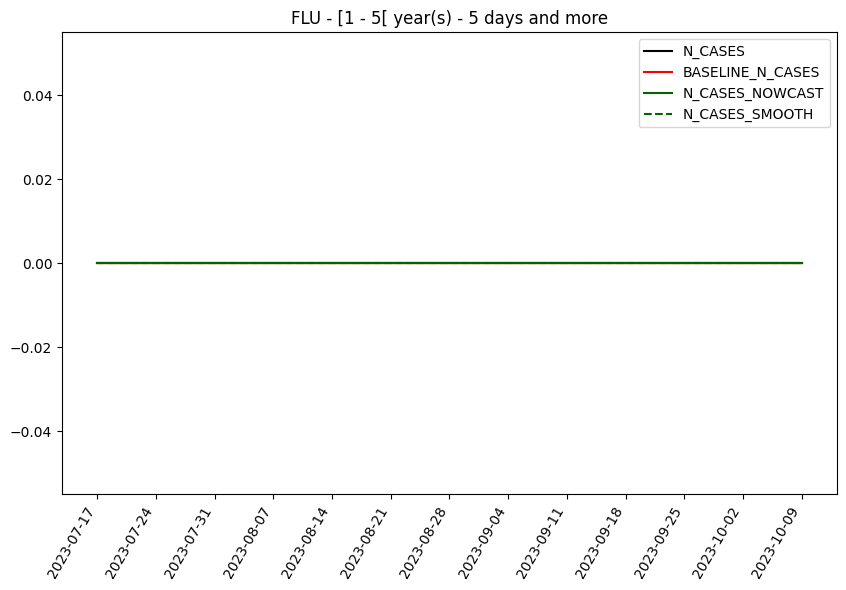

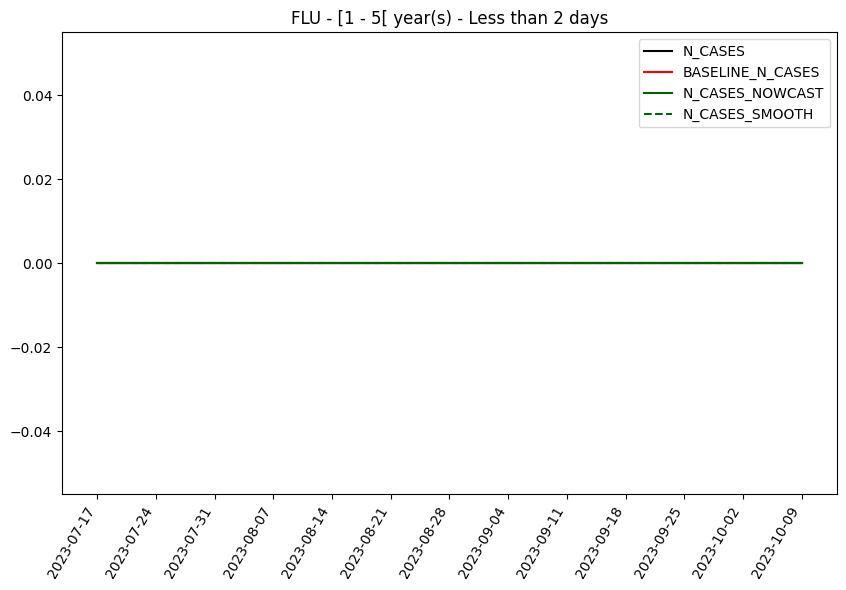

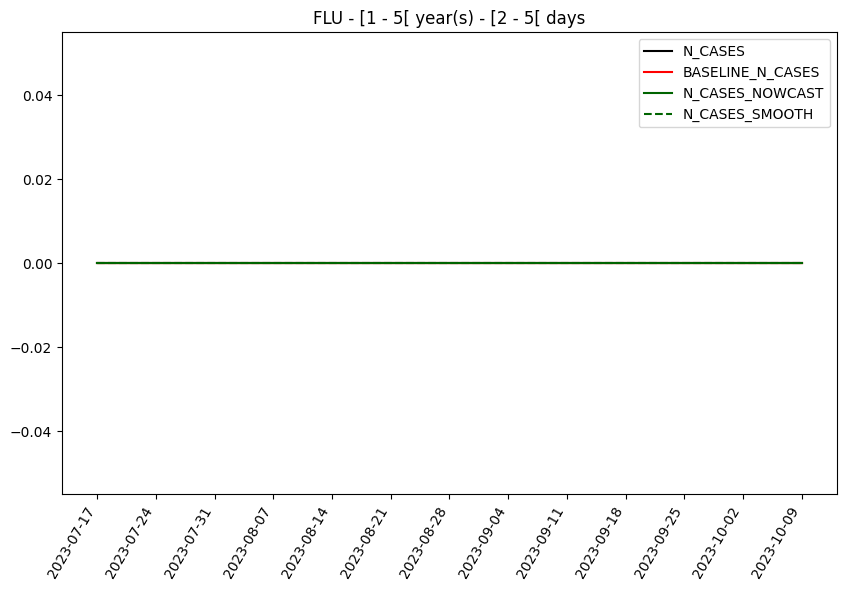

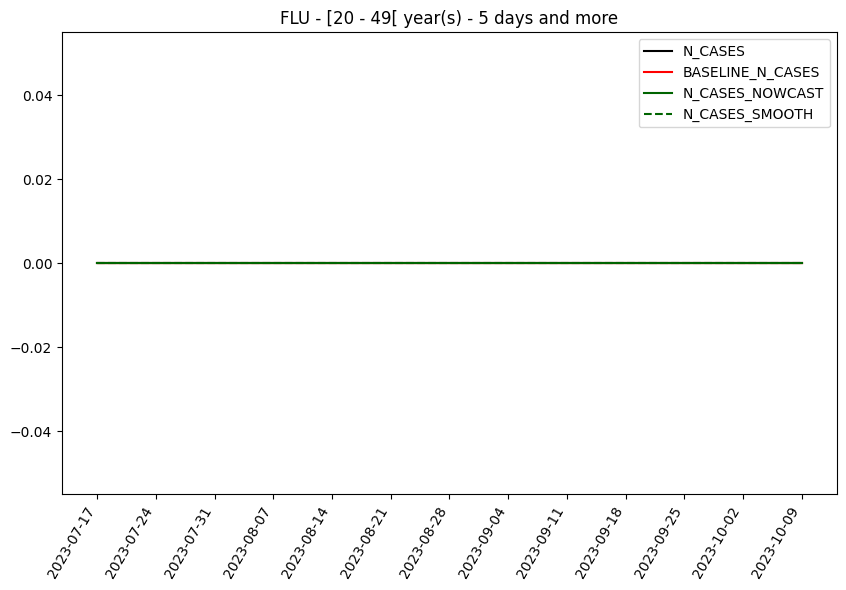

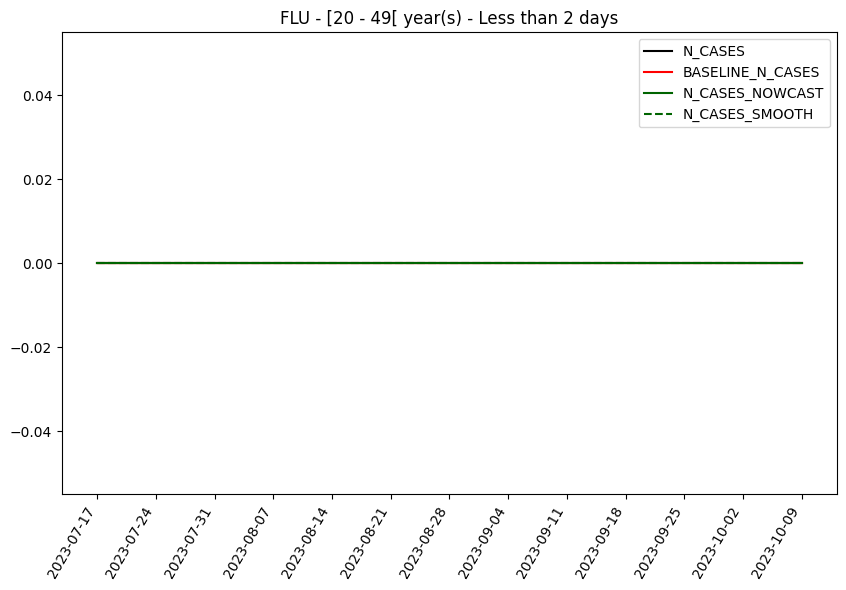

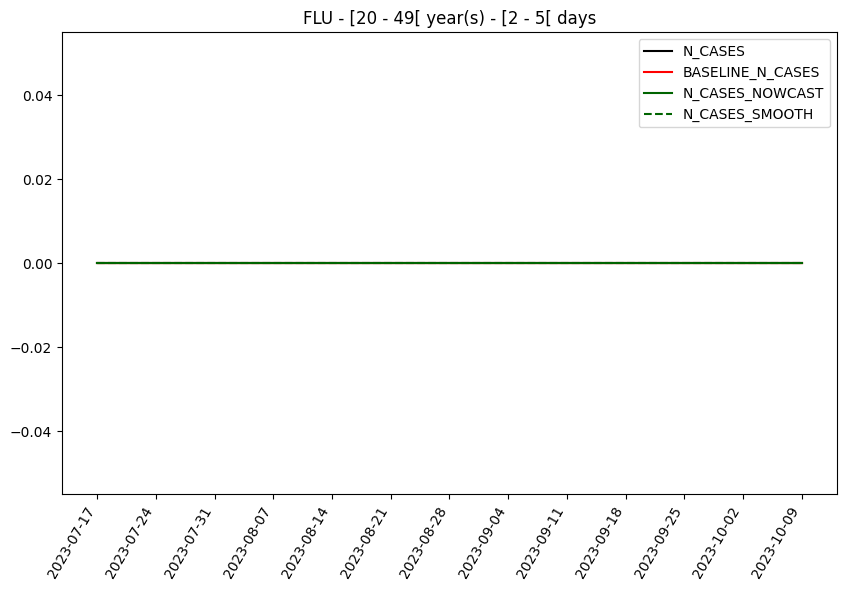

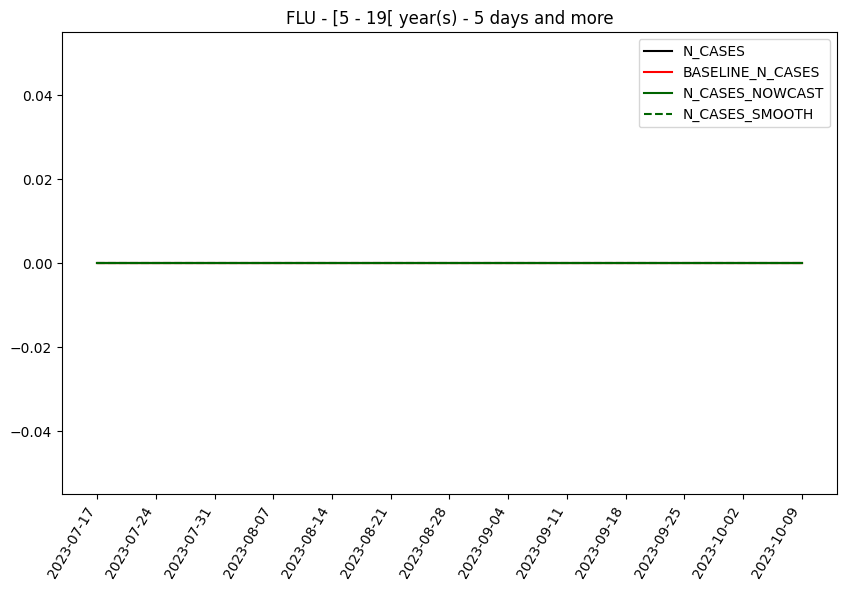

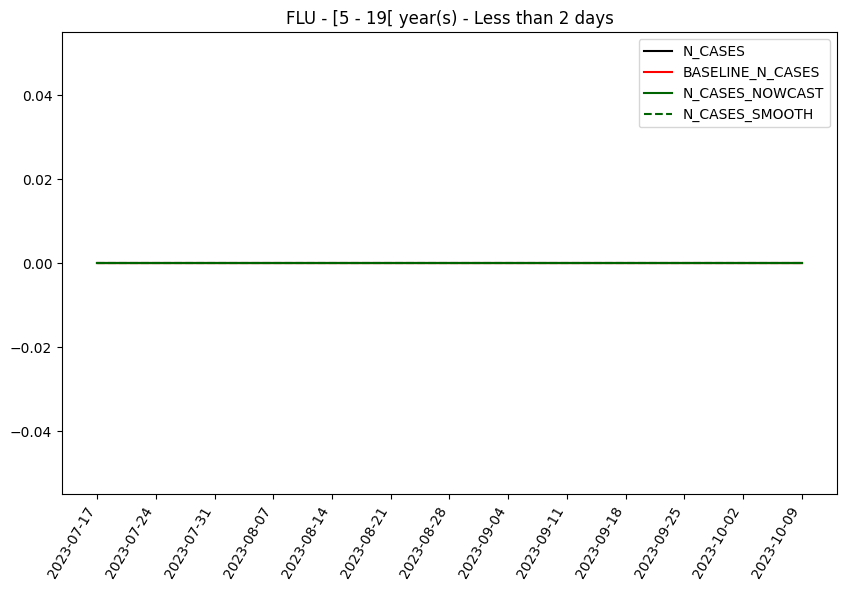

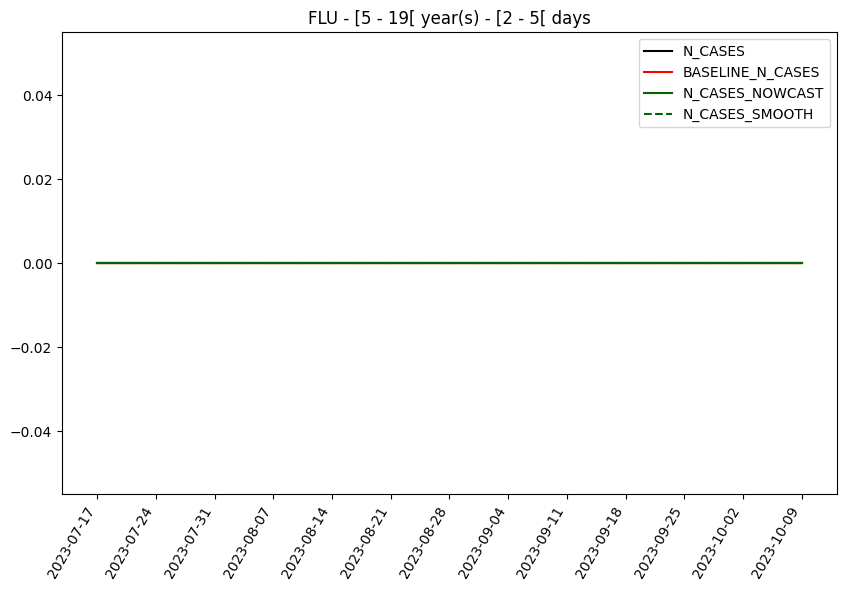

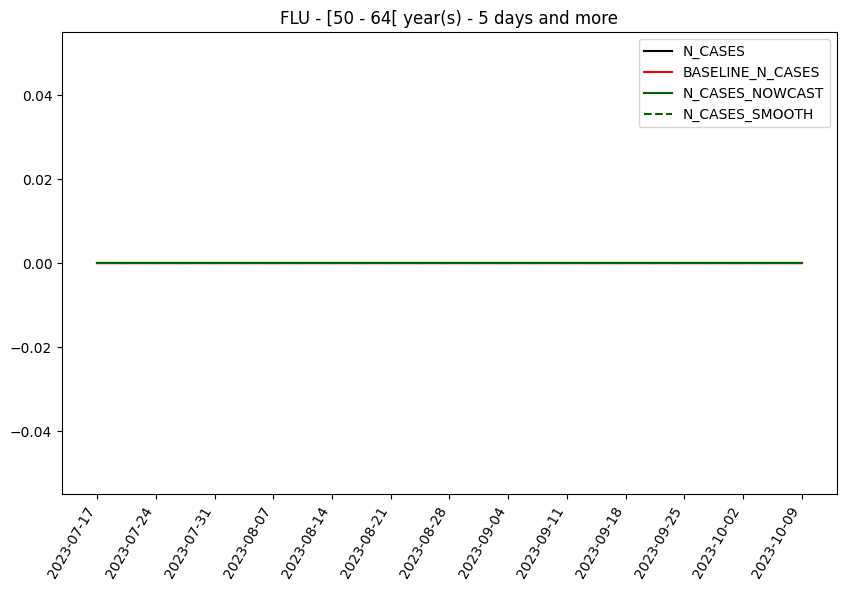

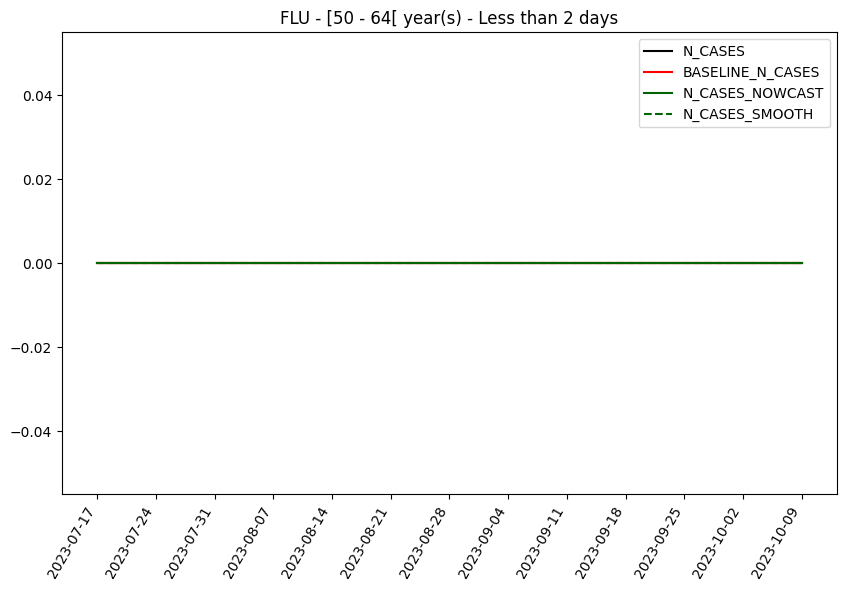

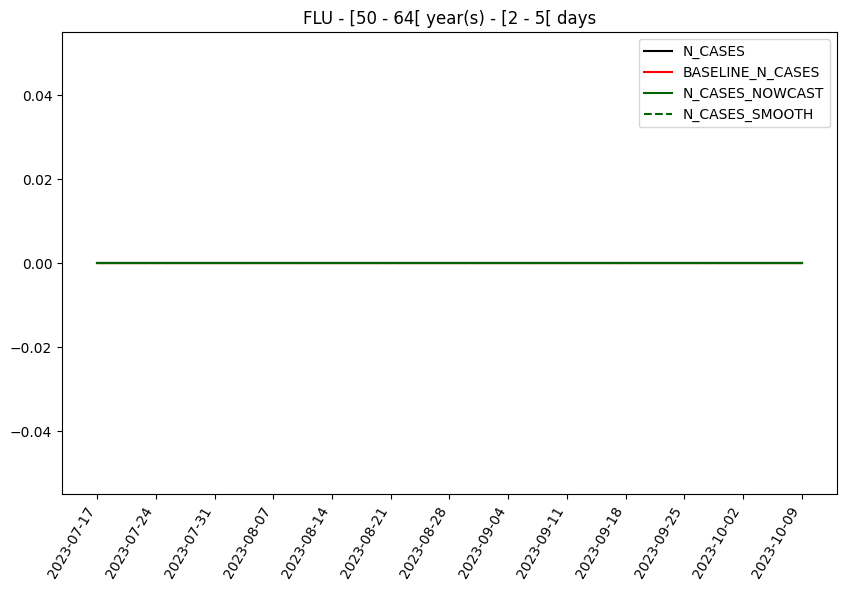

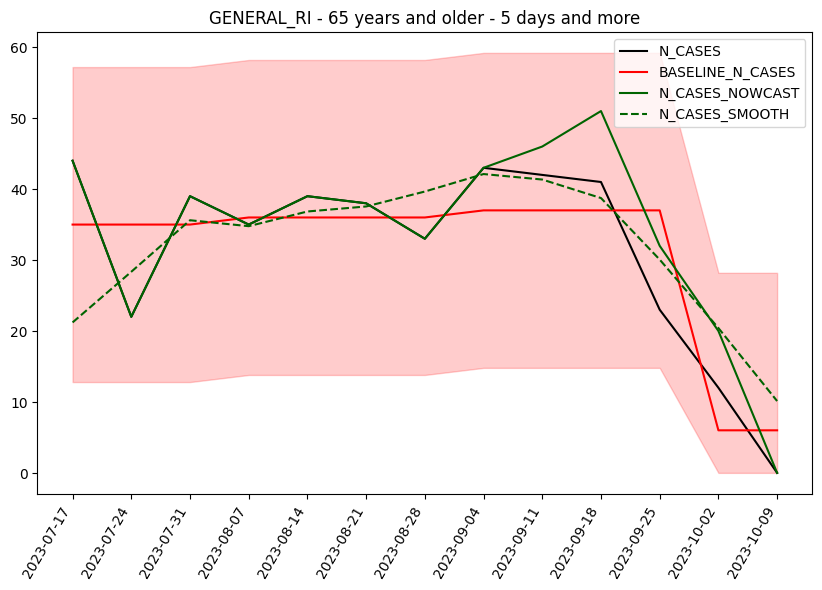

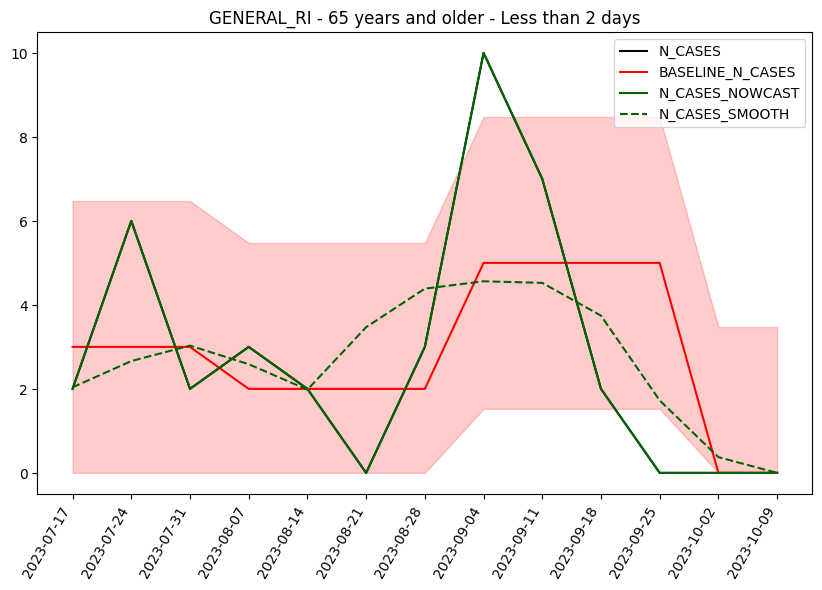

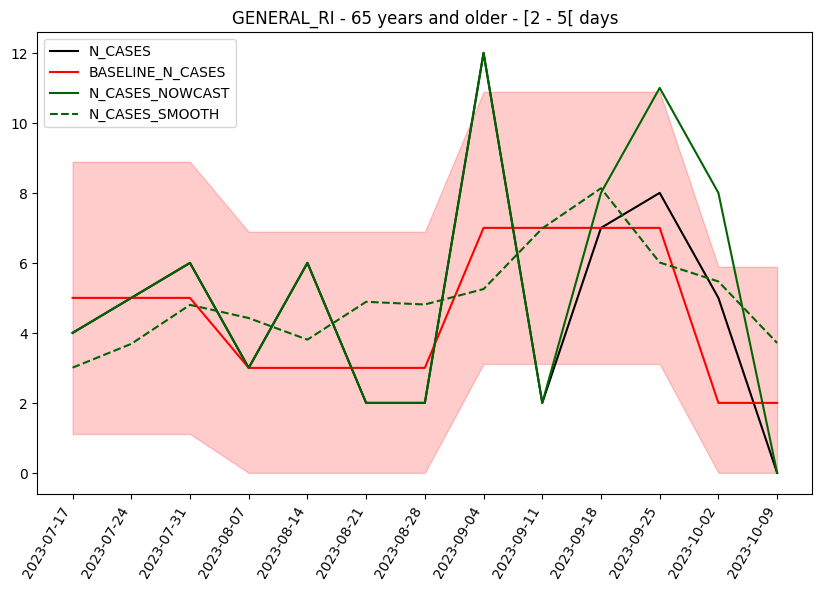

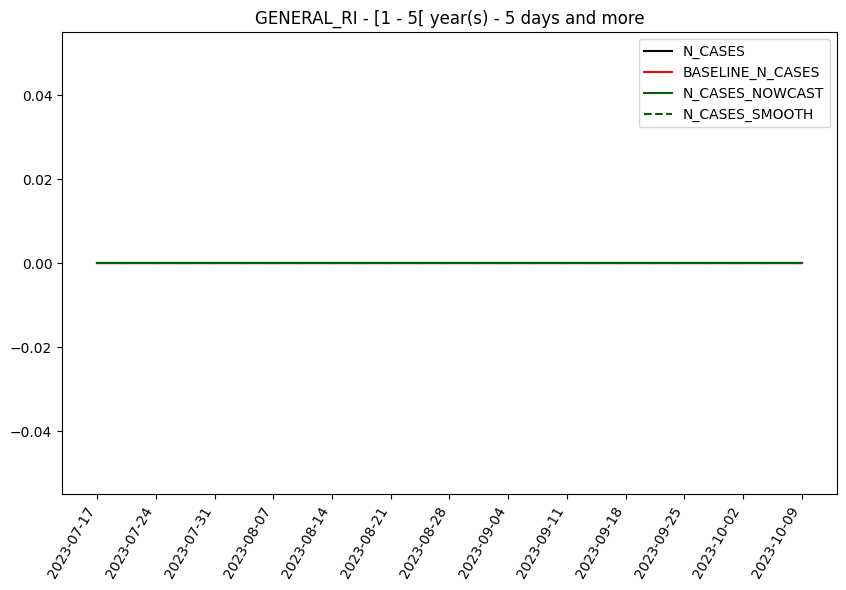

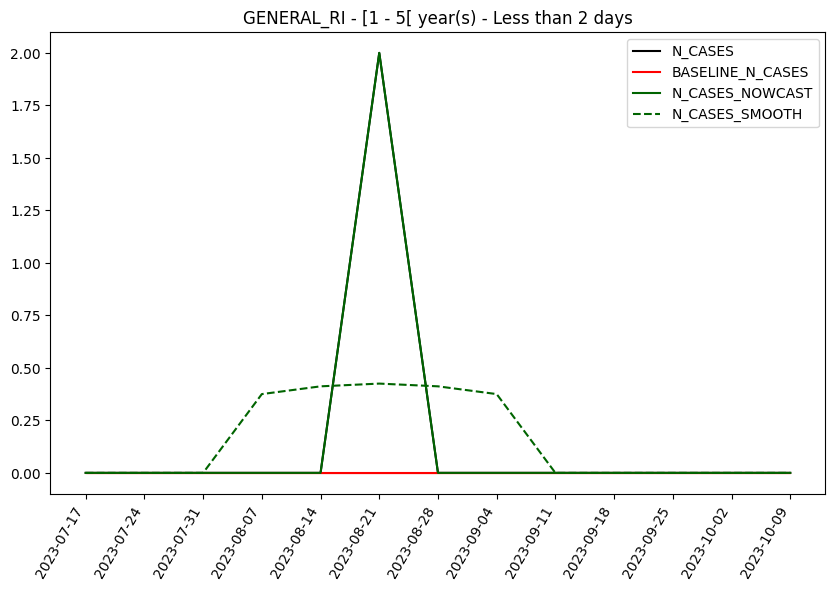

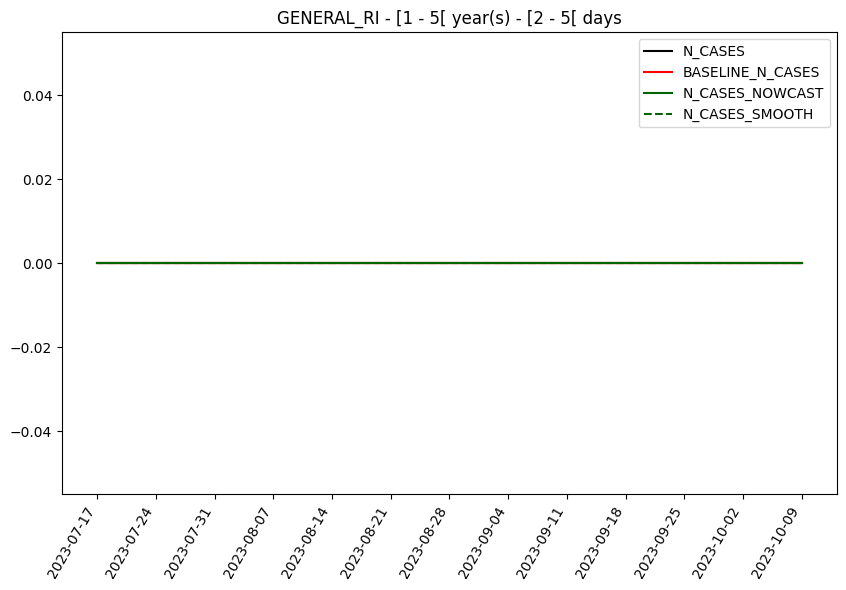

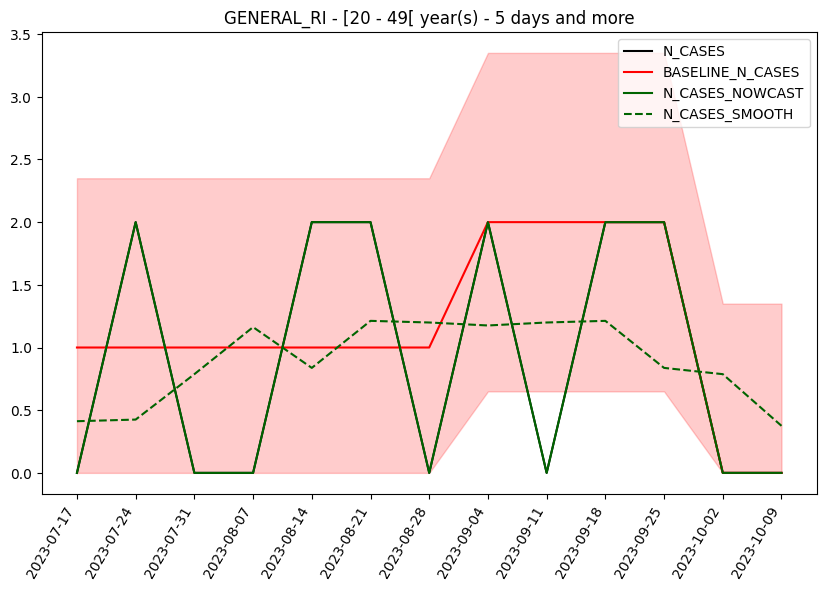

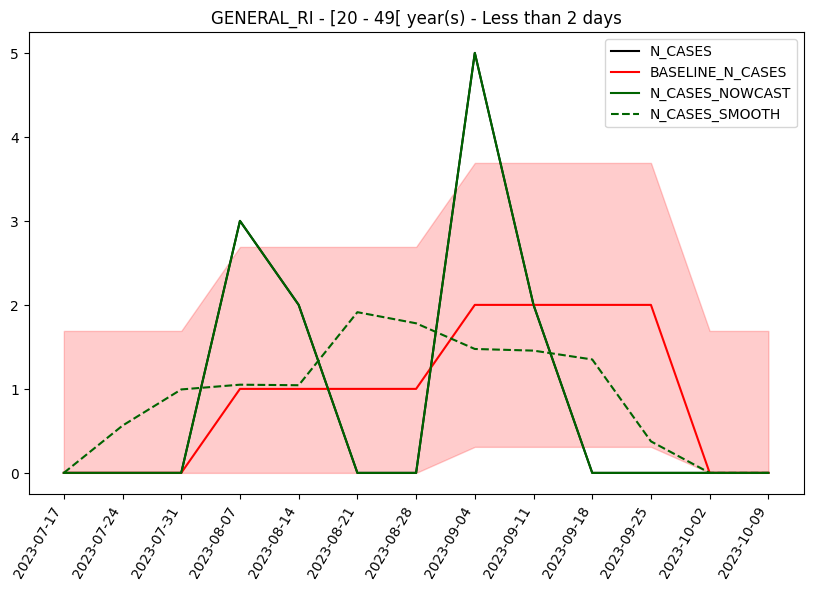

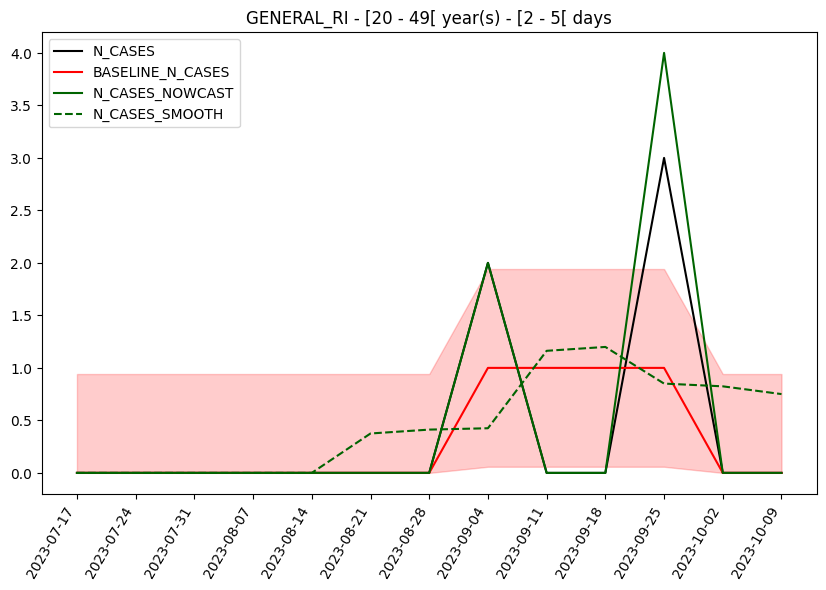

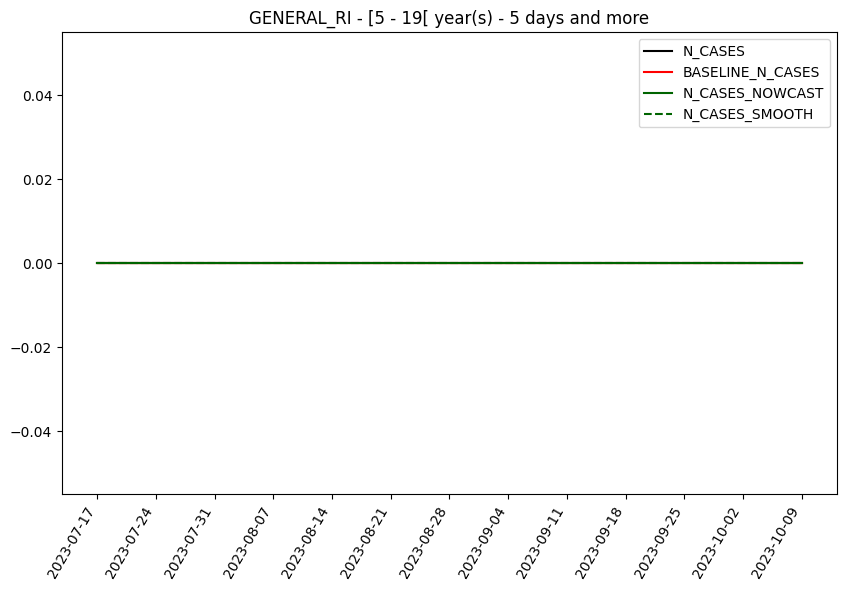

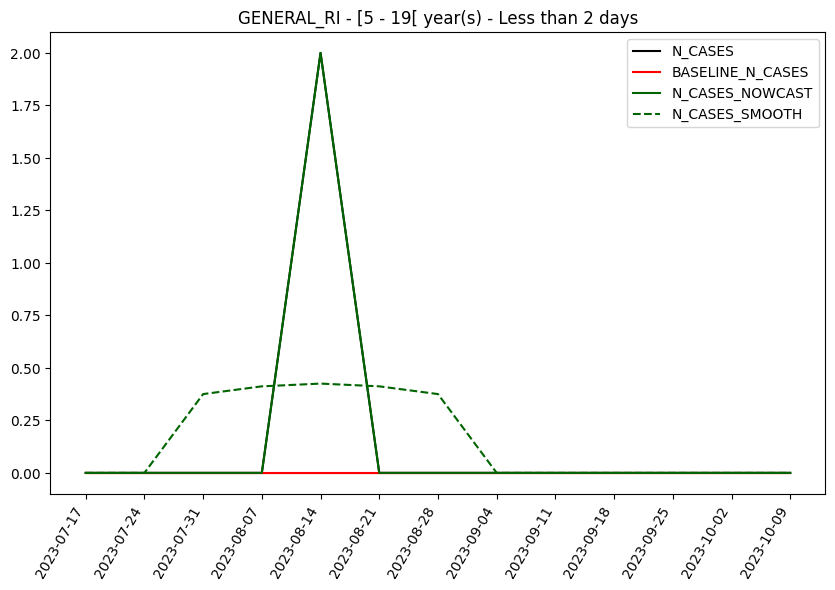

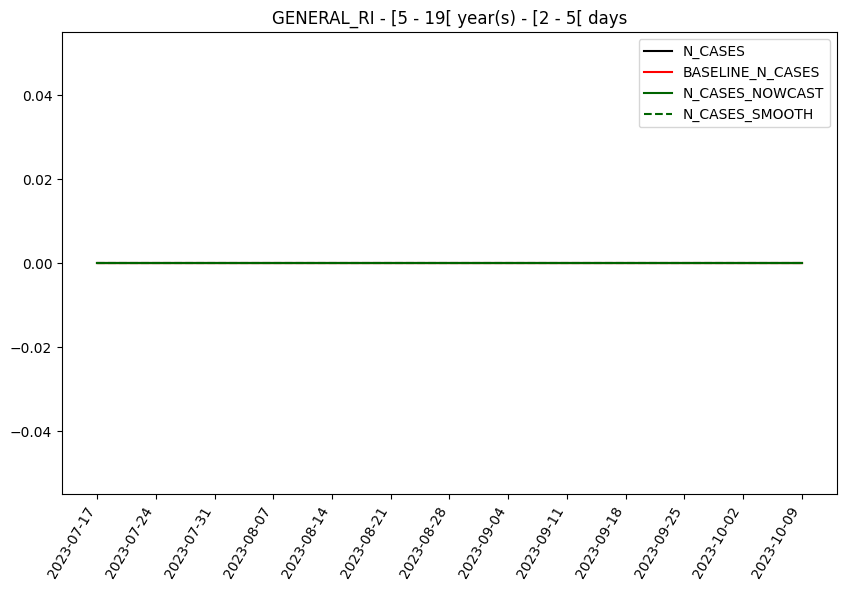

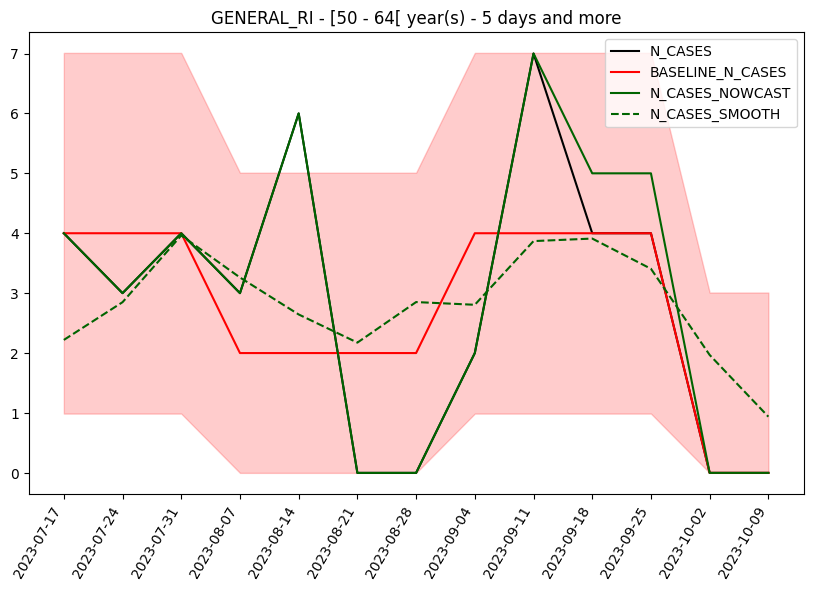

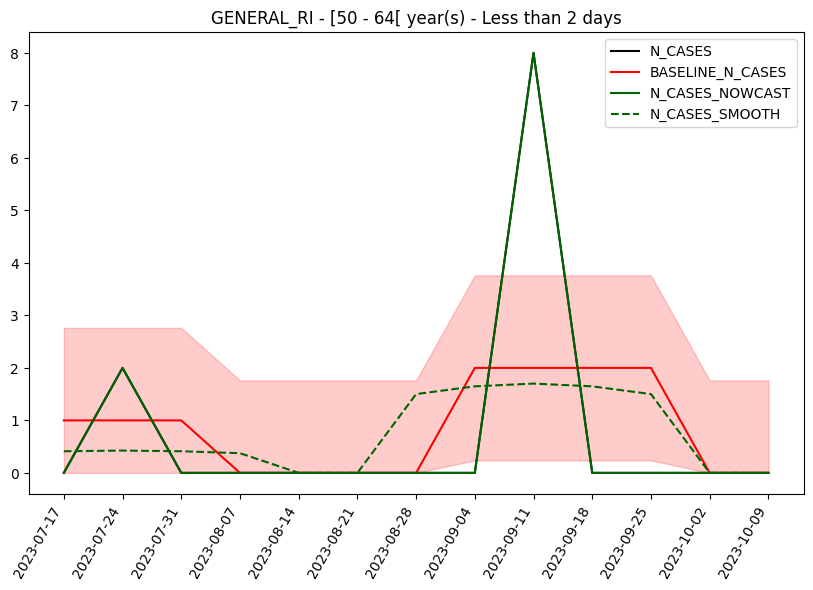

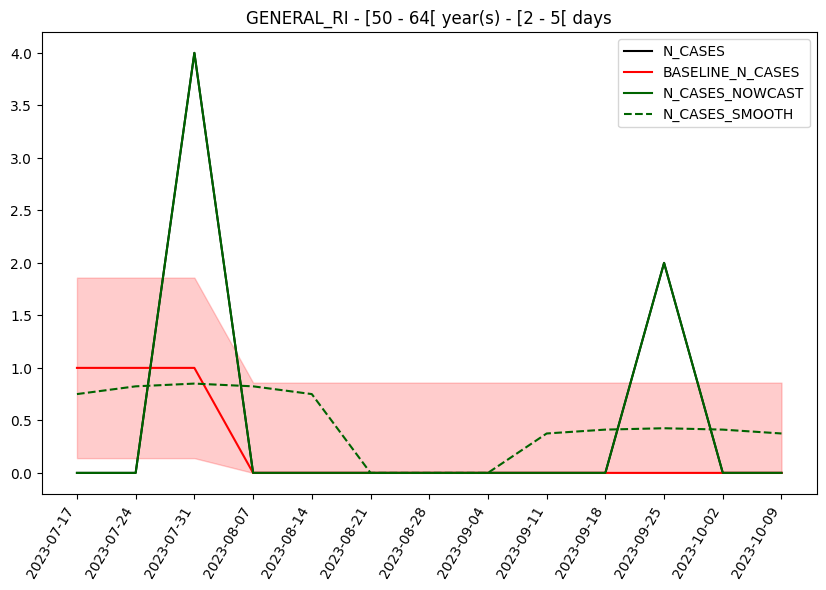

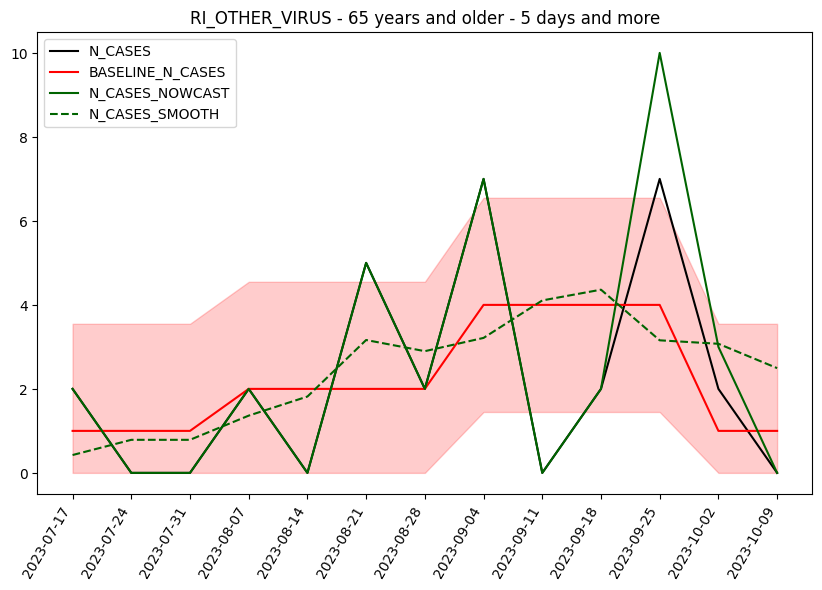

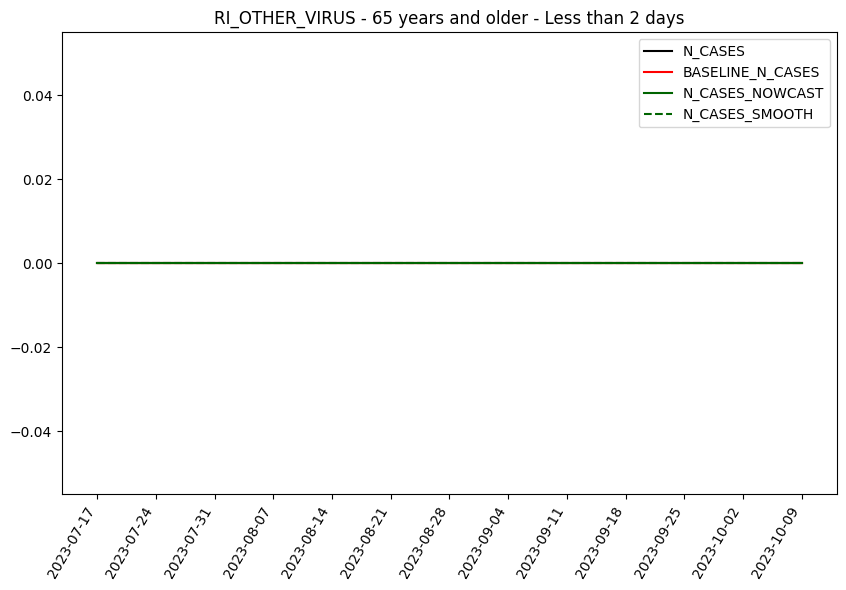

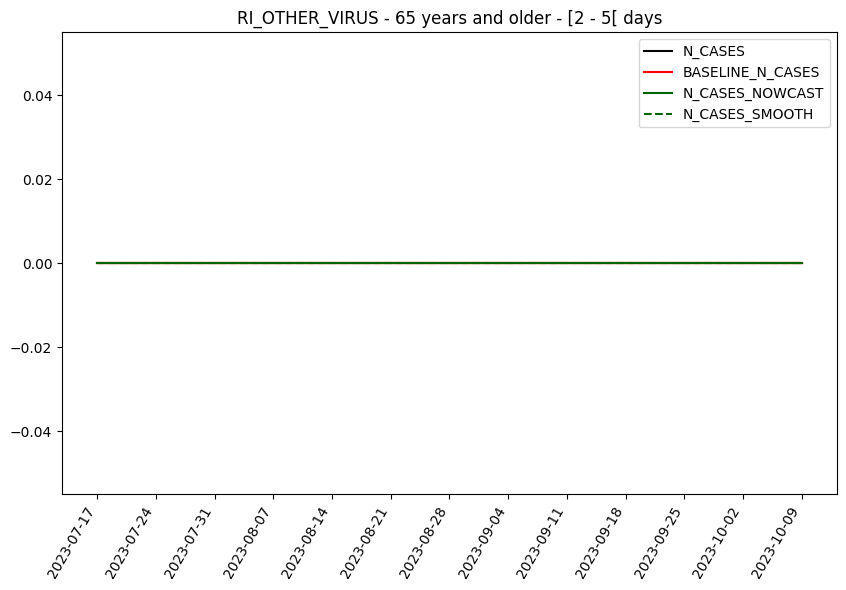

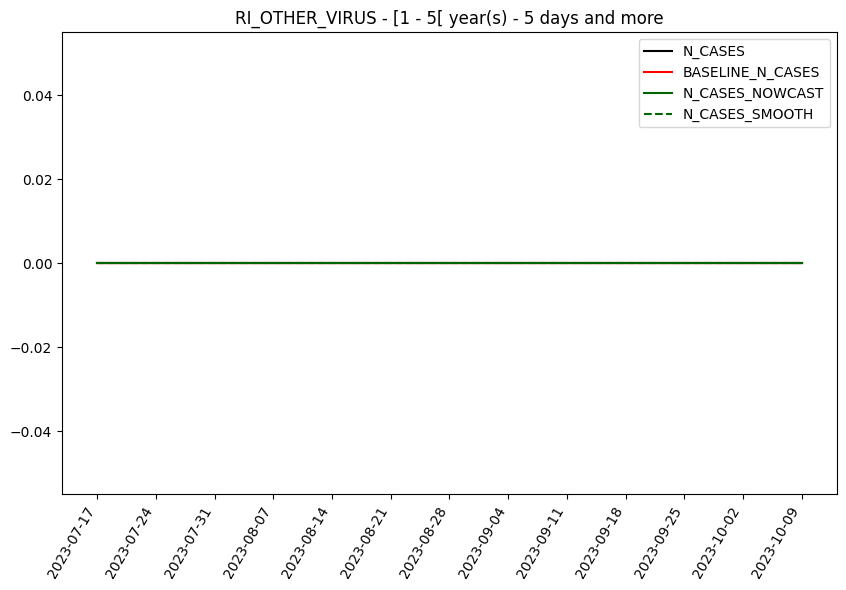

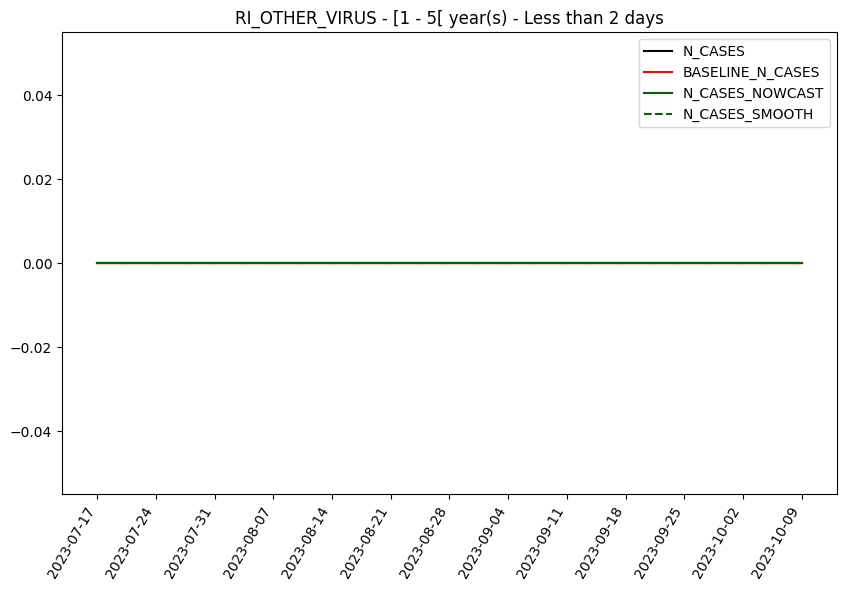

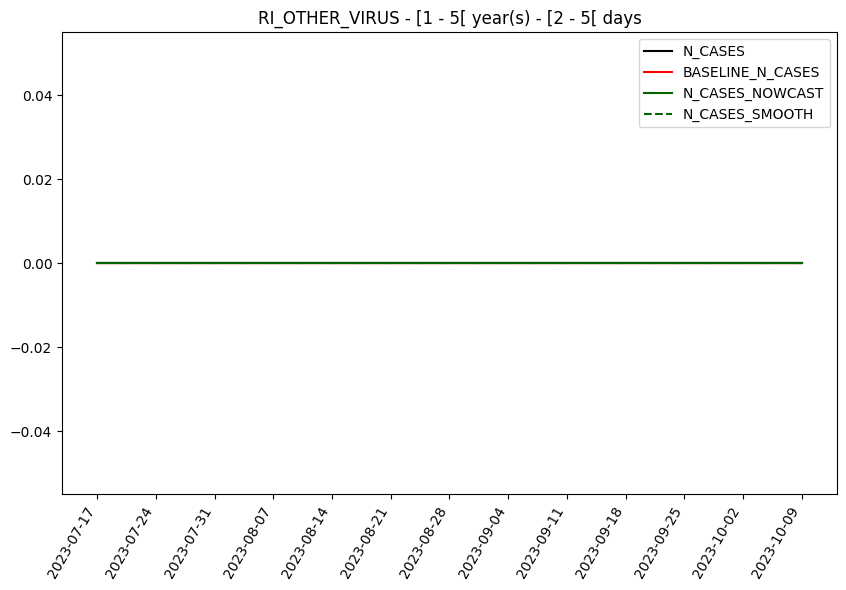

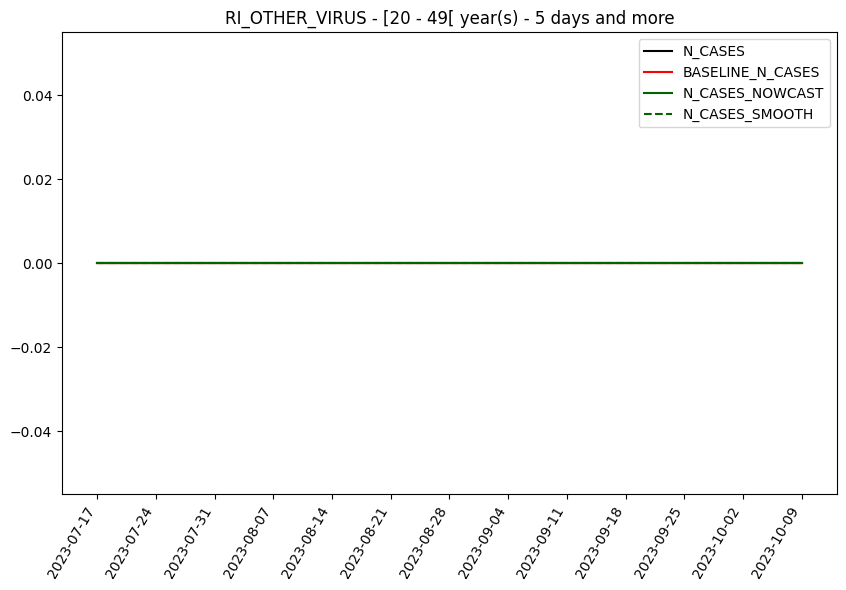

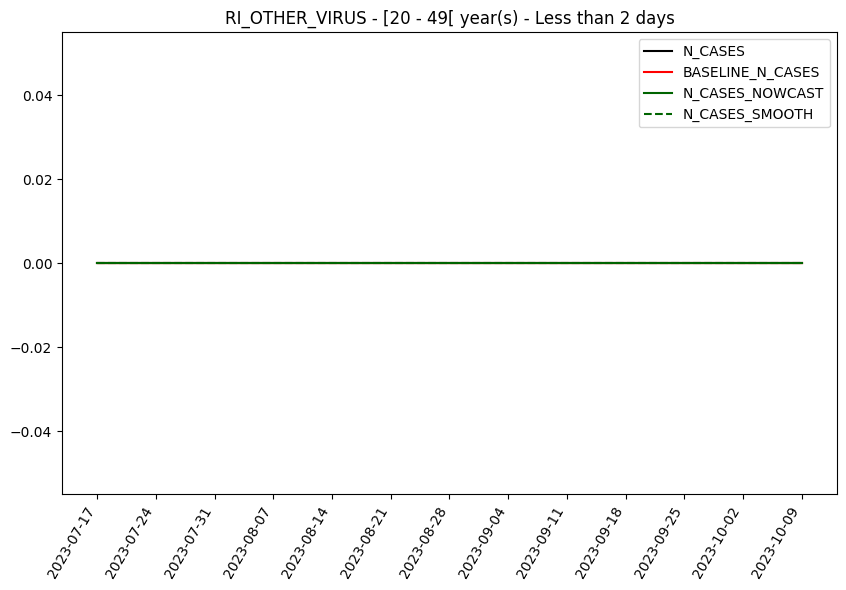

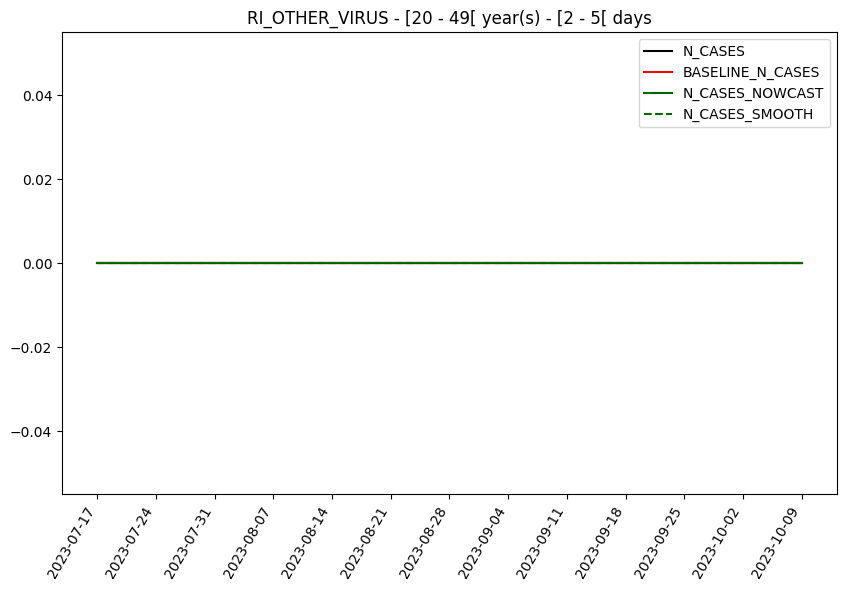

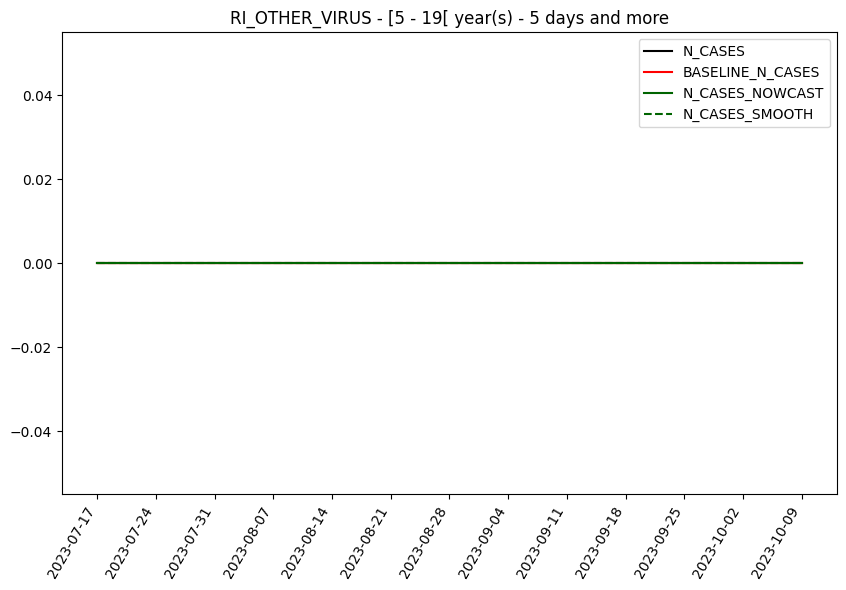

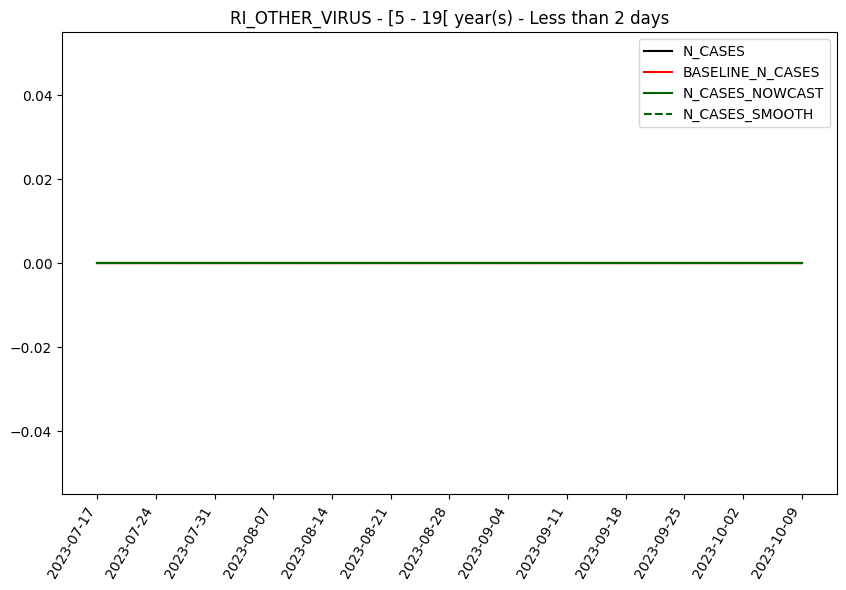

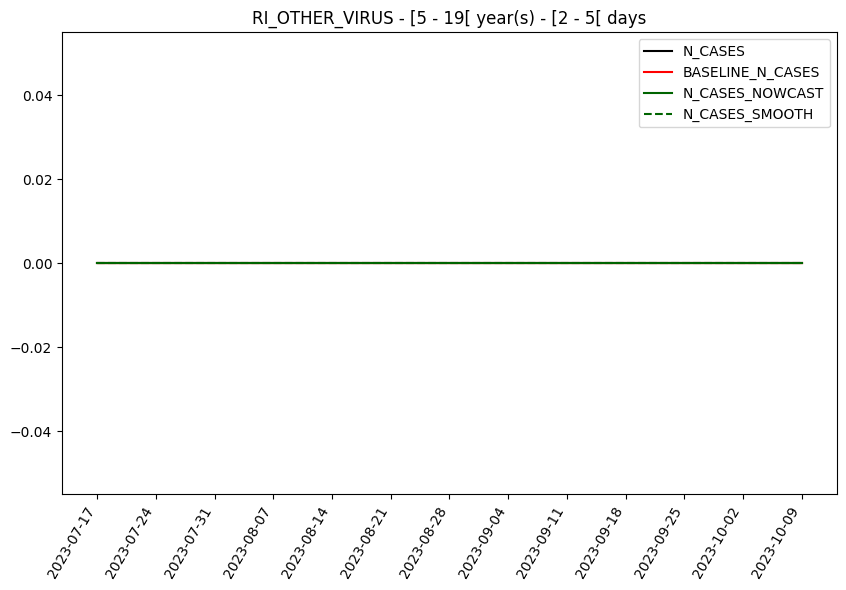

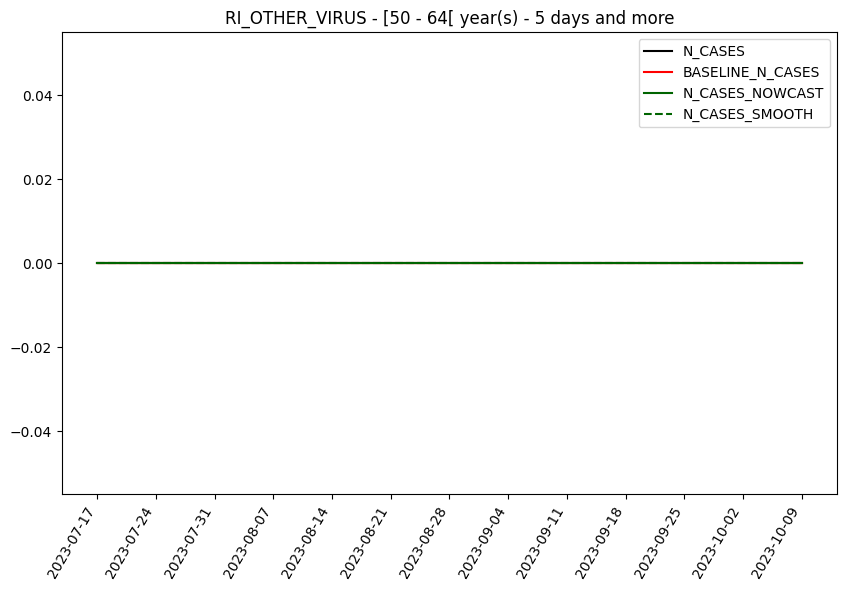

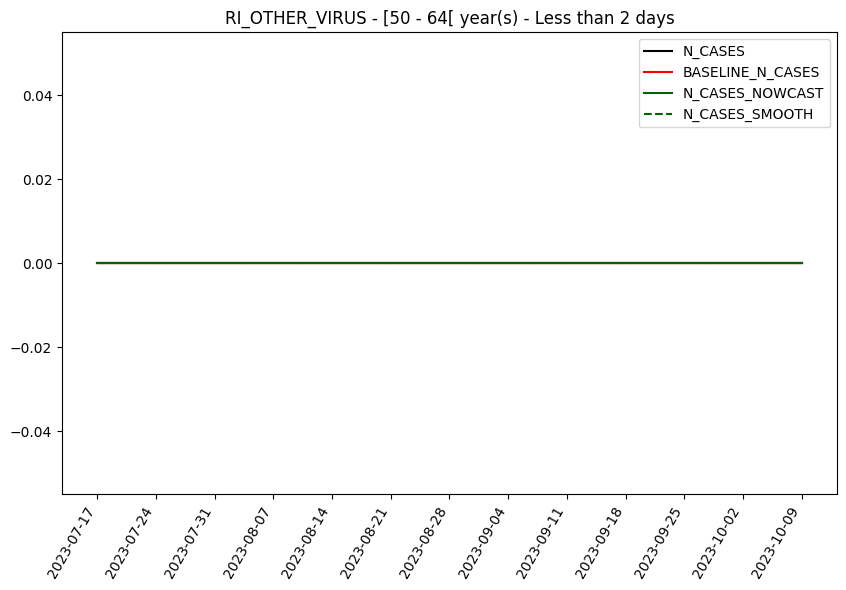

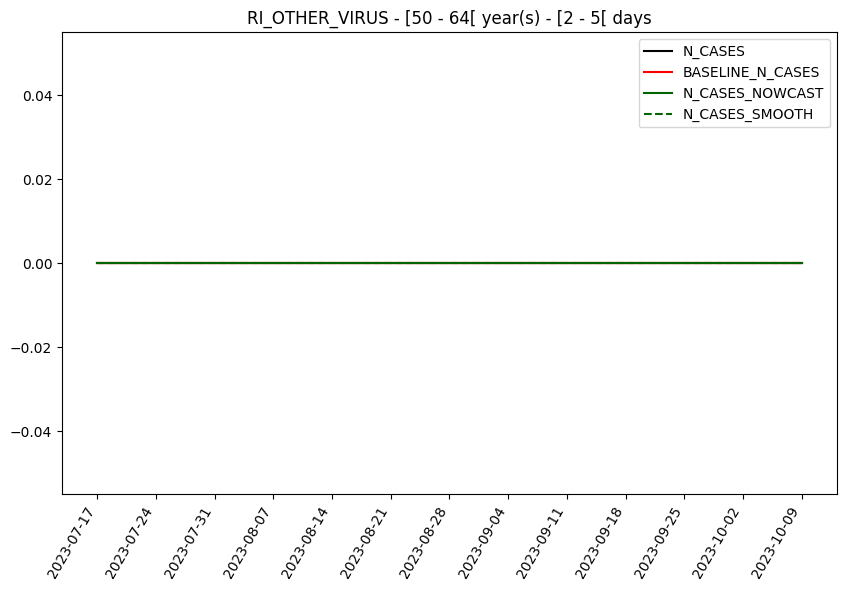

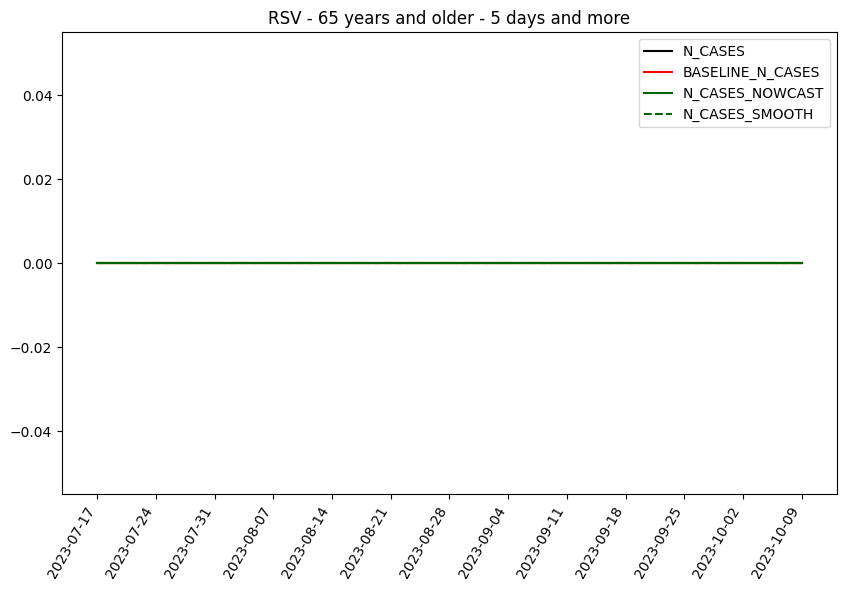

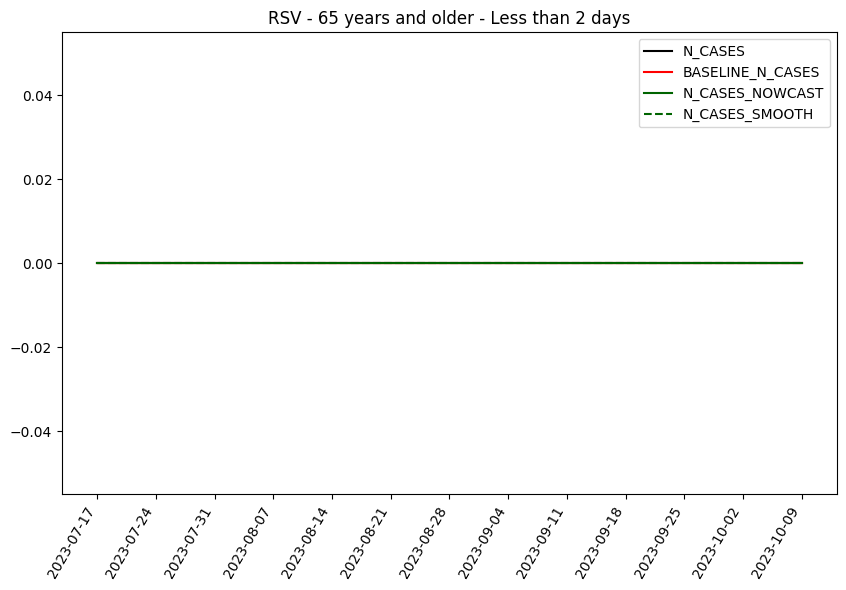

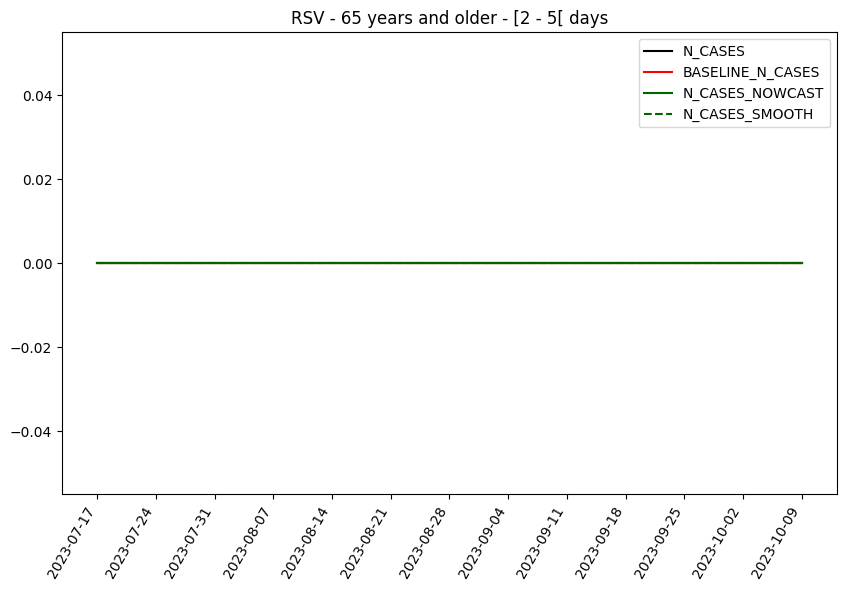

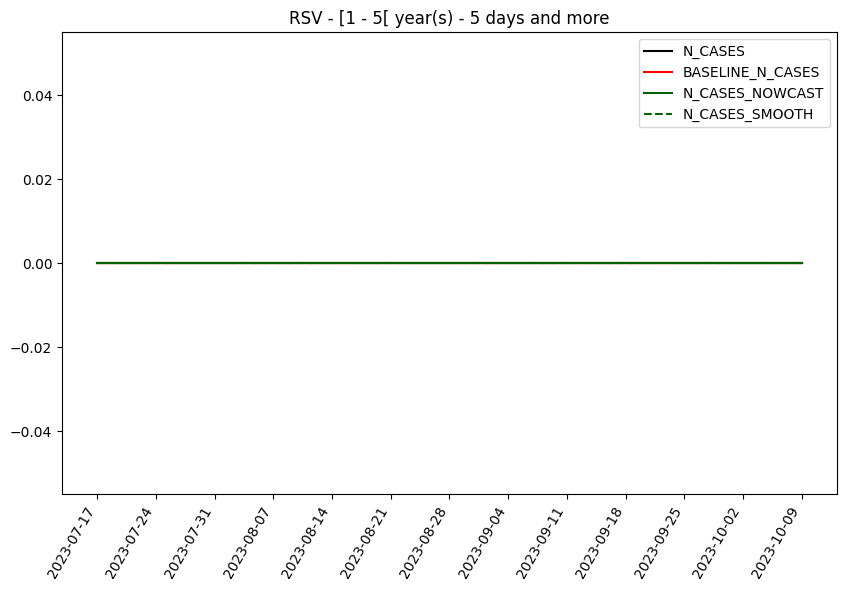

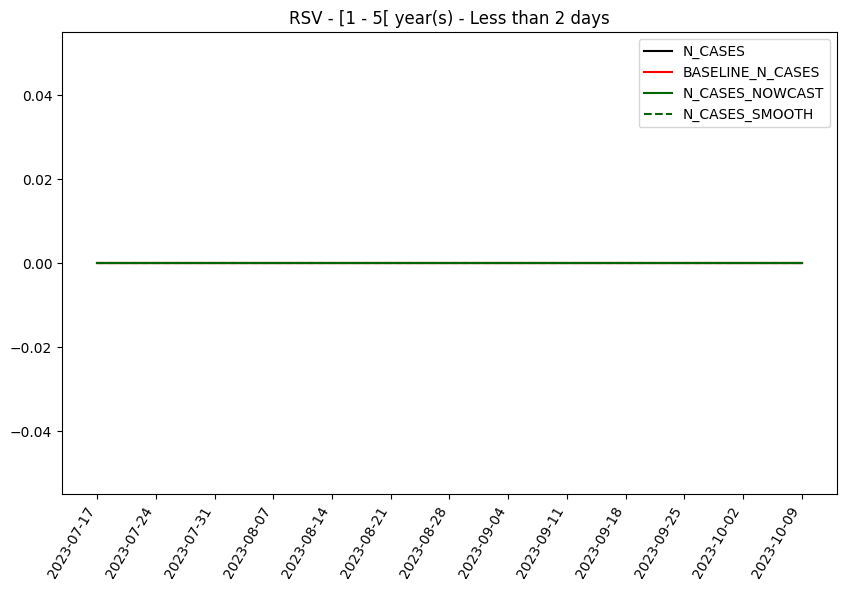

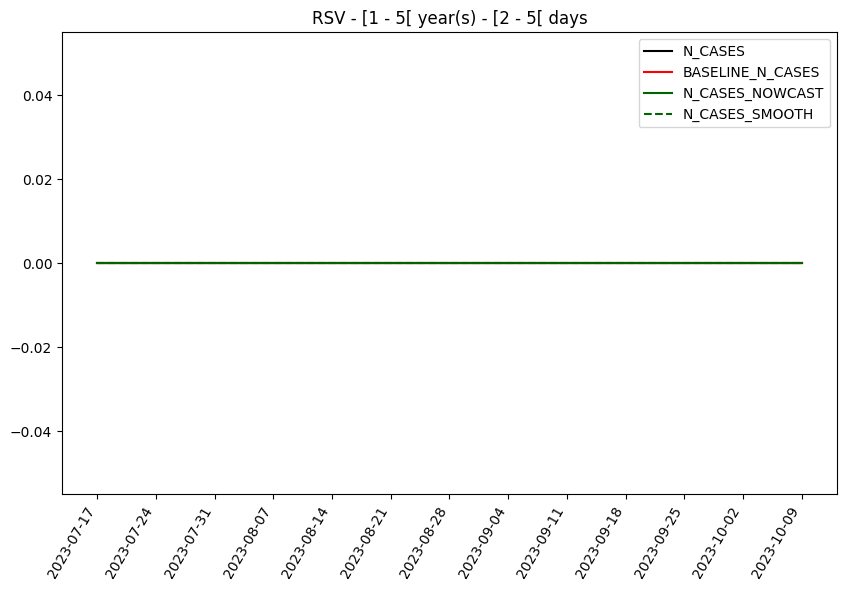

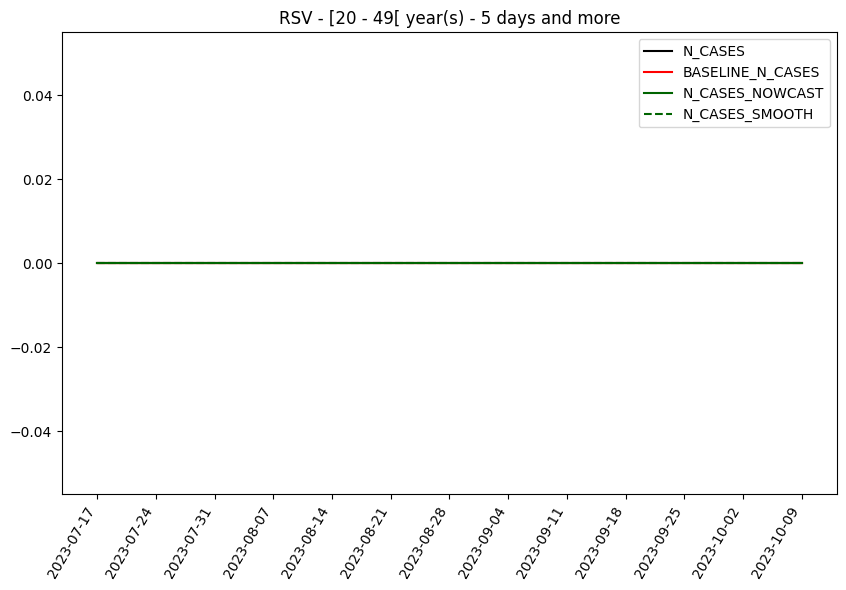

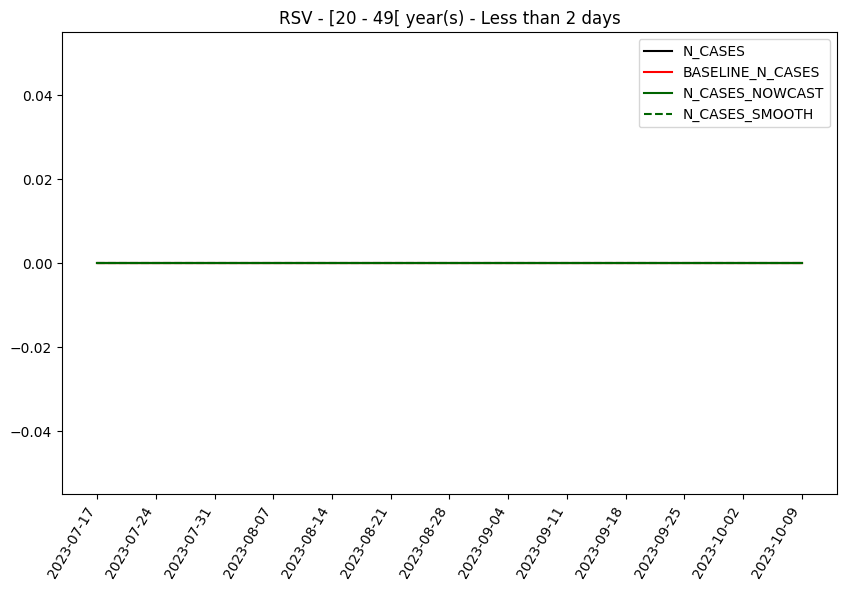

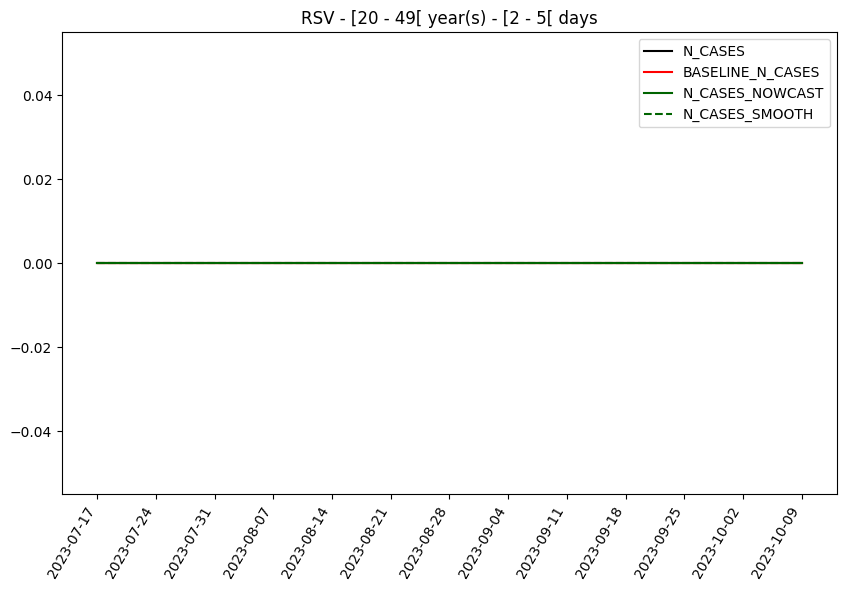

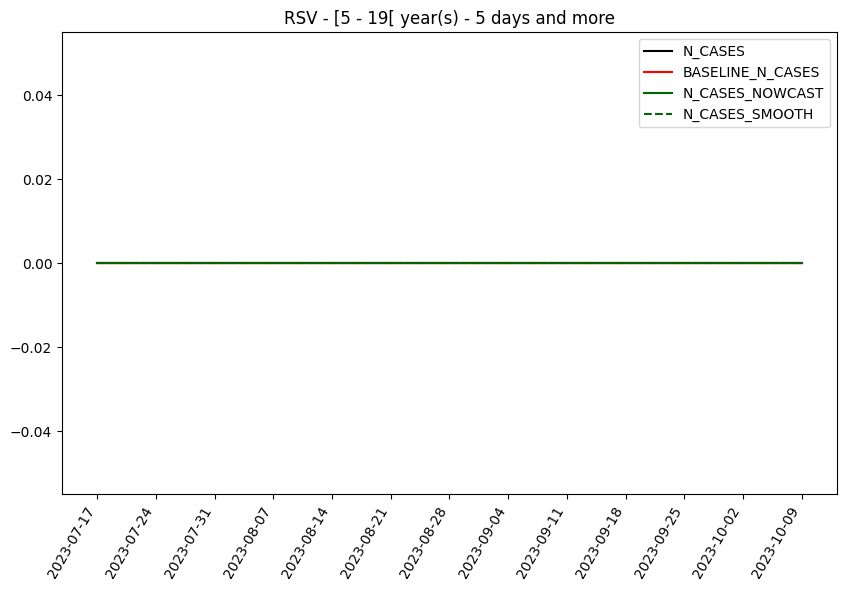

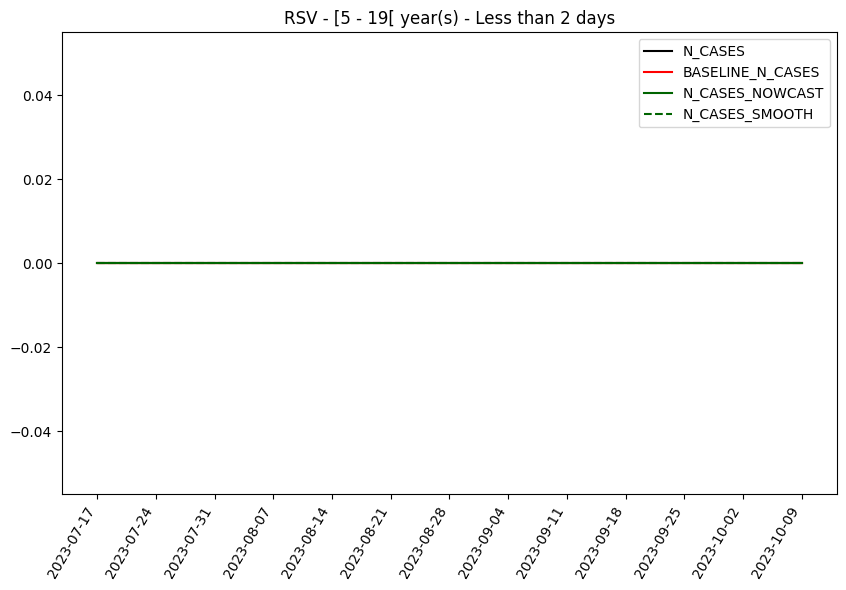

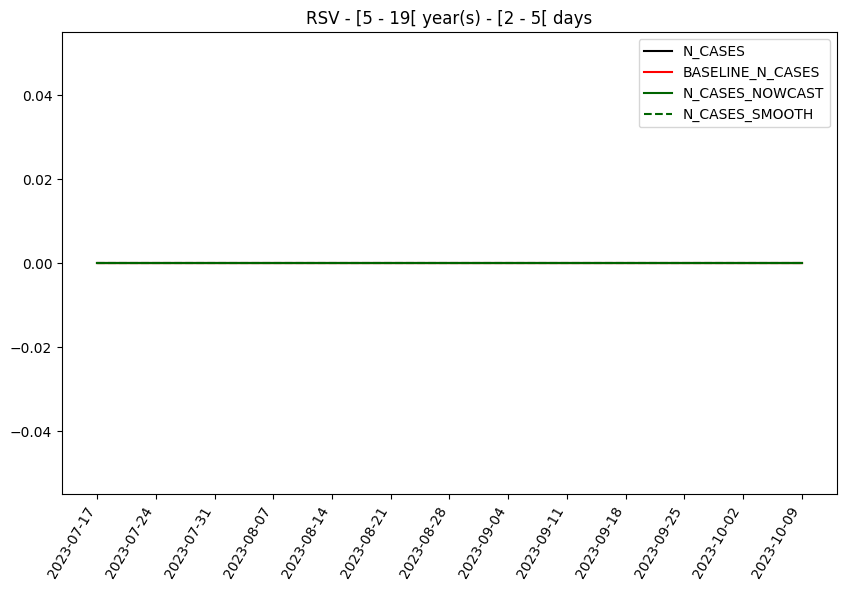

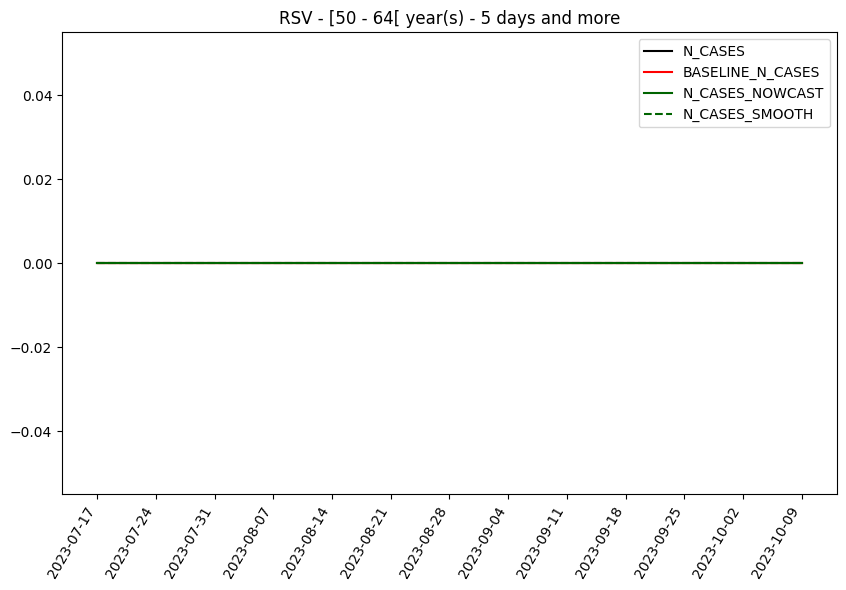

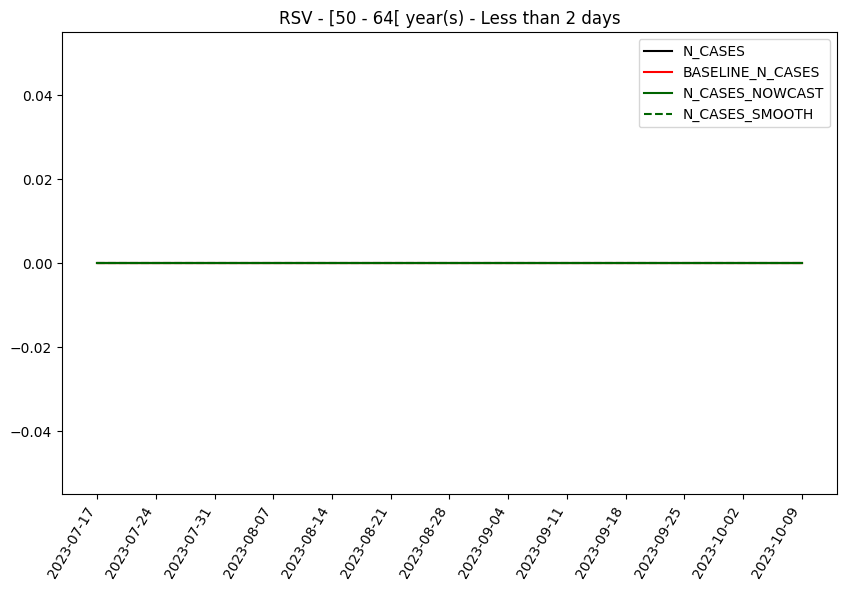

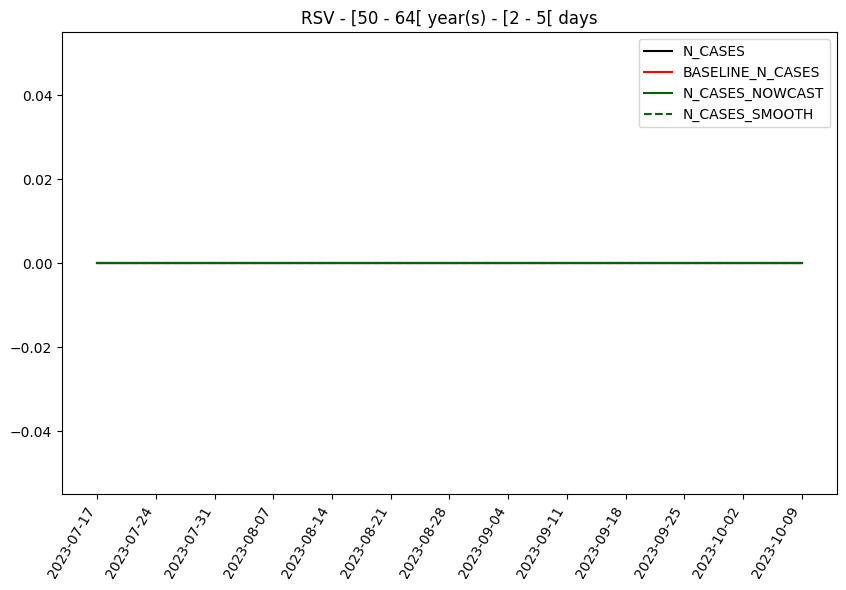

In [100]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_file_path = r'C:\Users\jrubio\vivalto_data\data\04_feature\table_I_final_vivalto.csv'
df = pd.read_csv(csv_file_path)
df
# Supposons que votre DataFrame s'appelle df
# Assurez-vous d'ajuster les noms de colonnes en fonction de votre tableau

# Liste des catégories uniques pour chaque colonne
categories_diagnosis = df['DIAGNOSIS_CATEGORY'].unique()
categories_age = df['AGE_CLASS'].unique()
categories_rss_duration = df['RSS_DURATION_CLASS'].unique()
# Liste des colonnes d'intervalle de confiance
ci_columns = ['LOWER_CI_BASELINE_N_CASES', 'UPPER_CI_BASELINE_N_CASES']

# Convertir les colonnes d'intervalle de confiance en type de données float
df[ci_columns] = df[ci_columns].astype(float)
# Boucle sur chaque combinaison de catégories
for diagnosis_category in categories_diagnosis:
    for age_class in categories_age:
        for rss_duration_class in categories_rss_duration:
            # Sous-ensemble des données pour la combinaison actuelle de catégories
            subset = df[(df['DIAGNOSIS_CATEGORY'] == diagnosis_category) &
                        (df['AGE_CLASS'] == age_class) &
                        (df['RSS_DURATION_CLASS'] == rss_duration_class)]

            # Création d'une figure et d'axes pour chaque combinaison
            fig, ax = plt.subplots(figsize=(10, 6))

            # Tracer N_CASES en noir
            ax.plot(subset['WEEK_LABEL'], subset['N_CASES'], color='black', label='N_CASES')

            # Tracer BASELINE_N_CASES en rouge avec intervalle de confiance
            baseline = subset['BASELINE_N_CASES']
            lower_ci_baseline = np.nan_to_num(subset['LOWER_CI_BASELINE_N_CASES'])
            upper_ci_baseline = np.nan_to_num(subset['UPPER_CI_BASELINE_N_CASES'])
            
            ax.plot(subset['WEEK_LABEL'], baseline, color='red', label='BASELINE_N_CASES')
            ax.fill_between(subset['WEEK_LABEL'], lower_ci_baseline, upper_ci_baseline, color='red', alpha=0.2)

            # Tracer N_CASES_NOWCAST en vert sombre
            ax.plot(subset['WEEK_LABEL'], subset['N_CASES_NOWCAST'], color='darkgreen', label='N_CASES_NOWCAST')

            # Tracer N_CASES_SMOOTH en vert foncé
            ax.plot(subset['WEEK_LABEL'], subset['N_CASES_NOWCAST_SMOOTH'], color='darkgreen', linestyle='dashed', label='N_CASES_SMOOTH')

            # Ajouter des étiquettes et une légende
            ax.set_title(f"{diagnosis_category} - {age_class} - {rss_duration_class}")
            ax.legend()

            # Incliner les étiquettes de l'axe des x à 60 degrés
            plt.xticks(rotation=60, ha='right')

            # Afficher le graphique
            plt.show()


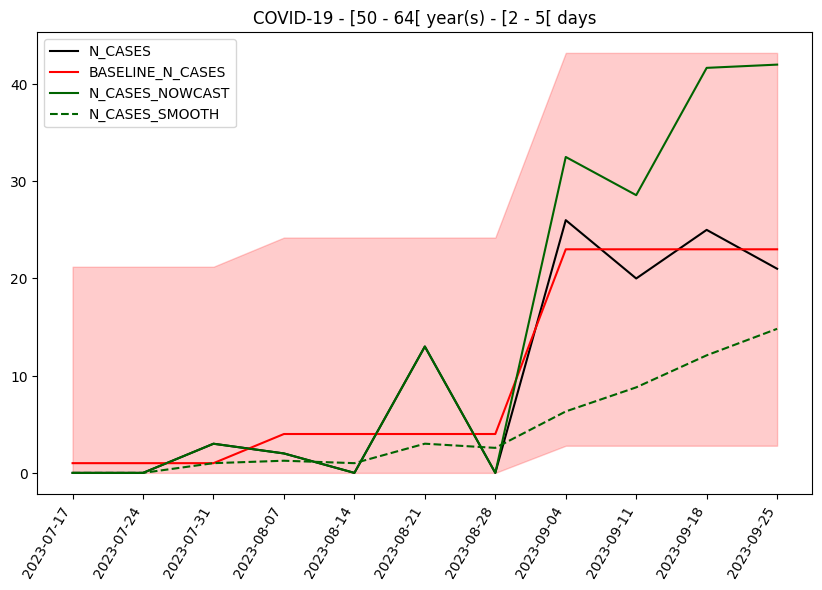

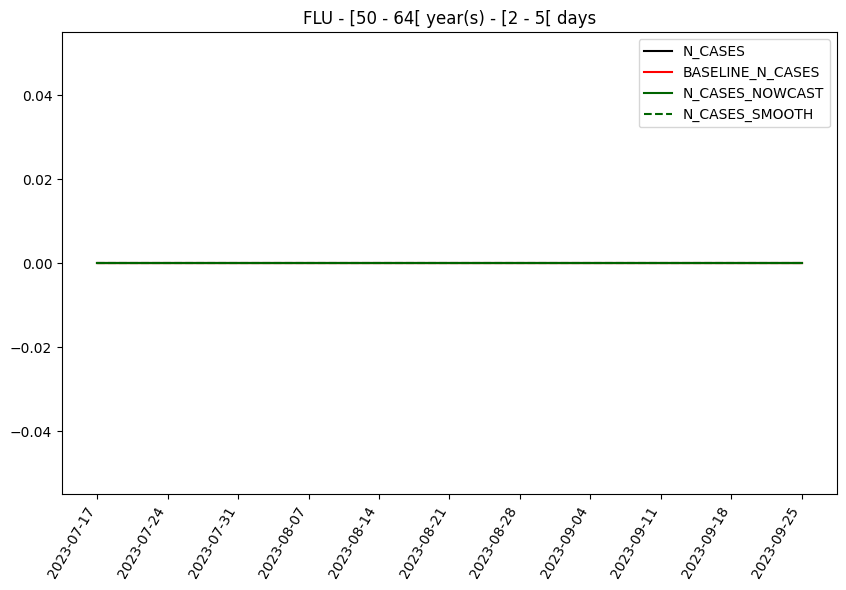

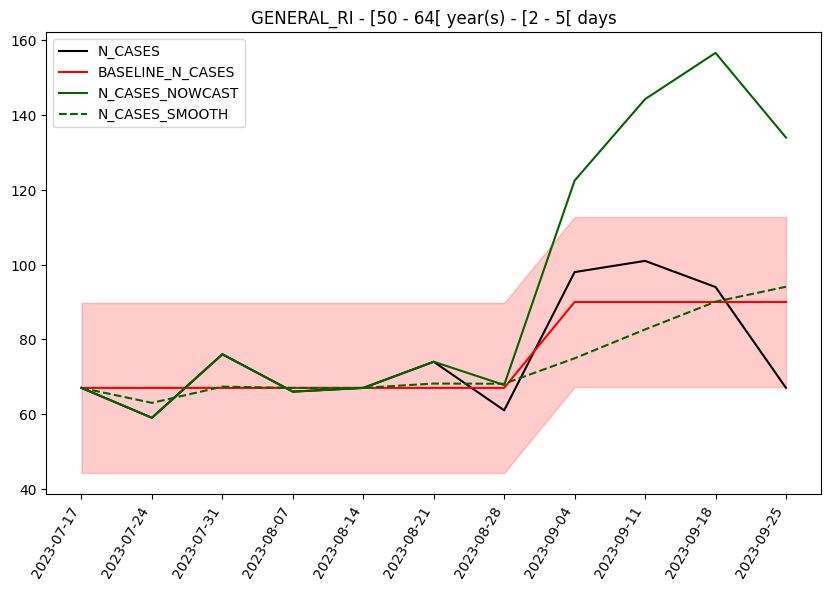

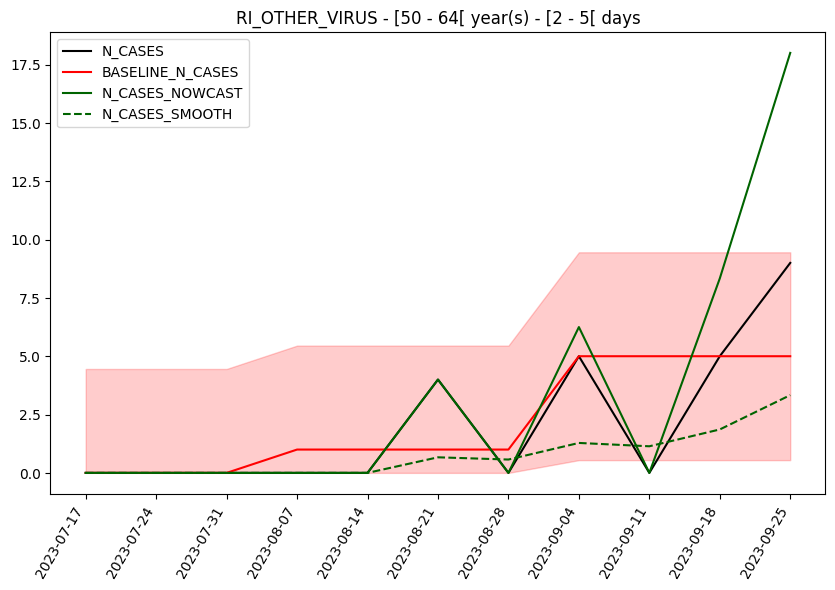

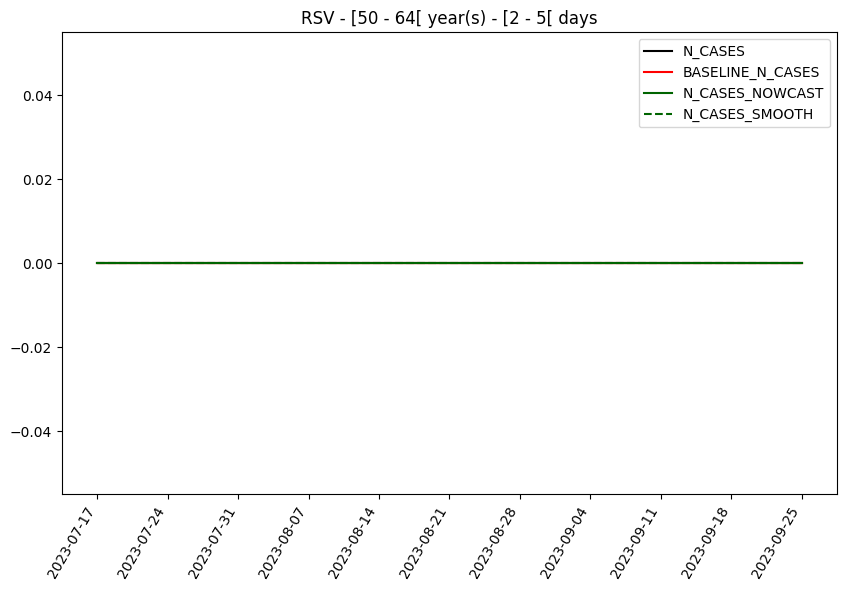

In [99]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_file_path = r'C:\Users\jrubio\vivalto_data\data\04_feature\table_II_final_vivalto.csv'
df = pd.read_csv(csv_file_path)
df
# Supposons que votre DataFrame s'appelle df
# Assurez-vous d'ajuster les noms de colonnes en fonction de votre tableau

# Liste des catégories uniques pour chaque colonne
categories_diagnosis = df['DIAGNOSIS_CATEGORY'].unique()
# Liste des colonnes d'intervalle de confiance
ci_columns = ['LOWER_CI_BASELINE_N_CASES', 'UPPER_CI_BASELINE_N_CASES']

# Convertir les colonnes d'intervalle de confiance en type de données float
df[ci_columns] = df[ci_columns].astype(float)
# Boucle sur chaque combinaison de catégories
for diagnosis_category in categories_diagnosis:
    # Sous-ensemble des données pour la combinaison actuelle de catégories
    subset = df[(df['DIAGNOSIS_CATEGORY'] == diagnosis_category)]
    
    # Création d'une figure et d'axes pour chaque combinaison
    fig, ax = plt.subplots(figsize=(10, 6))

    # Tracer N_CASES en noir
    ax.plot(subset['WEEK_LABEL'], subset['N_CASES'], color='black', label='N_CASES')

    # Tracer BASELINE_N_CASES en rouge avec intervalle de confiance
    baseline = subset['BASELINE_N_CASES']
    lower_ci_baseline = np.nan_to_num(subset['LOWER_CI_BASELINE_N_CASES'])
    upper_ci_baseline = np.nan_to_num(subset['UPPER_CI_BASELINE_N_CASES'])
    
    ax.plot(subset['WEEK_LABEL'], baseline, color='red', label='BASELINE_N_CASES')
    ax.fill_between(subset['WEEK_LABEL'], lower_ci_baseline, upper_ci_baseline, color='red', alpha=0.2)

    # Tracer N_CASES_NOWCAST en vert sombre
    ax.plot(subset['WEEK_LABEL'], subset['N_CASES_NOWCAST'], color='darkgreen', label='N_CASES_NOWCAST')

    # Tracer N_CASES_SMOOTH en vert foncé
    ax.plot(subset['WEEK_LABEL'], subset['N_CASES_NOWCAST_SMOOTH'], color='darkgreen', linestyle='dashed', label='N_CASES_SMOOTH')

    # Ajouter des étiquettes et une légende
    ax.set_title(f"{diagnosis_category} - {age_class} - {rss_duration_class}")
    ax.legend()

    # Incliner les étiquettes de l'axe des x à 60 degrés
    plt.xticks(rotation=60, ha='right')

    # Afficher le graphique
    plt.show()